In [144]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
stop_list = pd.read_csv('/home/piai/다운로드/제지/03_중지리스트.csv')
stop_list = stop_list.drop('Unnamed: 0', axis = 1)

stop_list['start_date'] = pd.to_datetime(stop_list['start_date'])
stop_list['end_date']   = pd.to_datetime(stop_list['end_date'])
stop_list

,facility,cause,start_date,end_date
0,ALL,공정청소,2021-01-01 09:17:00,2021-01-01 10:17:00
1,ALL,계획보수,2021-01-03 08:21:00,2021-01-03 16:00:00
2,ALL,계획보수,2021-01-03 16:00:00,2021-01-03 20:25:00
3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00
4,ALL,지종교체,2021-01-06 17:59:00,2021-01-06 18:16:00
...,...,...,...,...
506,2군 DRYER,불량중지,2021-12-28 14:16:00,2021-12-28 14:52:00
507,1군 DRYER,불량중지,2021-12-28 16:53:00,2021-12-28 17:35:00
508,ALL,공정청소,2021-12-30 00:00:00,2021-12-30 01:04:00
509,CALENDER,불량중지,2021-12-30 20:09:00,2021-12-30 20:23:00


In [129]:
stop = stop_list.query('facility=="3번 PRESS" & cause=="불량중지"')
stop.reset_index(inplace=True)
stop

,index,facility,cause,start_date,end_date
0,3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00
1,13,3번 PRESS,불량중지,2021-01-11 18:37:00,2021-01-11 19:08:00
2,14,3번 PRESS,불량중지,2021-01-11 21:57:00,2021-01-11 22:33:00
3,18,3번 PRESS,불량중지,2021-01-12 14:27:00,2021-01-12 14:47:00
4,19,3번 PRESS,불량중지,2021-01-12 17:43:00,2021-01-12 18:10:00
5,23,3번 PRESS,불량중지,2021-01-14 10:40:00,2021-01-14 11:10:00
6,25,3번 PRESS,불량중지,2021-01-14 19:01:00,2021-01-14 19:49:00
7,26,3번 PRESS,불량중지,2021-01-15 03:22:00,2021-01-15 03:52:00
8,27,3번 PRESS,불량중지,2021-01-15 09:12:00,2021-01-15 09:35:00
9,29,3번 PRESS,불량중지,2021-01-15 22:44:00,2021-01-15 23:03:00


In [133]:
all_tag = pd.read_csv("/home/piai/바탕화면/얄리얄리/all_tag_cause.csv", encoding='euc-kr')
all_tag = all_tag.drop('Unnamed: 0', axis = 1)

### 3번 PRESS 불량중지 2021-01-12 14:27:00 	2021-01-12 14:47:00

In [141]:
all_tag[(all_tag['datetime']=='2021-01-12 14:22:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
17228,2021-01-12 14:22:00,14.58745,3.610533,3.595463,91.199011,6.849933,0.0,0.0,100.0,93.273616,...,40.003223,38.946041,39.654563,39.769796,0.172846,0.412875,0.033097,0.019791,71.043544,정상


In [135]:
all_tag[(all_tag['datetime']=='2021-01-12 14:47:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
17253,2021-01-12 14:47:00,14.620075,3.651361,3.657823,60.883871,7.055365,0.0,0.0,100.0,92.963358,...,38.037193,41.169248,40.641626,41.753488,0.297391,0.428035,0.030531,0.01717,70.792045,불량중지


In [142]:
press = all_tag.loc[17228:17253, ['datetime','TAG_075','TAG_076','TAG_077']]
press.head(50)

,datetime,TAG_075,TAG_076,TAG_077
17228,2021-01-12 14:22:00,98.218750,99.894920,14.237624
17229,2021-01-12 14:23:00,98.218750,99.894920,14.240296
17230,2021-01-12 14:24:00,97.819491,99.509879,14.242968
17231,2021-01-12 14:25:00,97.225754,98.949651,14.245640
17232,2021-01-12 14:26:00,65.615203,67.151338,7.367446
17233,2021-01-12 14:27:00,46.272730,47.325353,3.379146
17234,2021-01-12 14:28:00,44.000062,45.751647,2.868204
17235,2021-01-12 14:29:00,54.705522,56.432027,5.043031
17236,2021-01-12 14:30:00,95.672805,97.199578,13.847589
17237,2021-01-12 14:31:00,97.332446,99.435281,14.149596


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


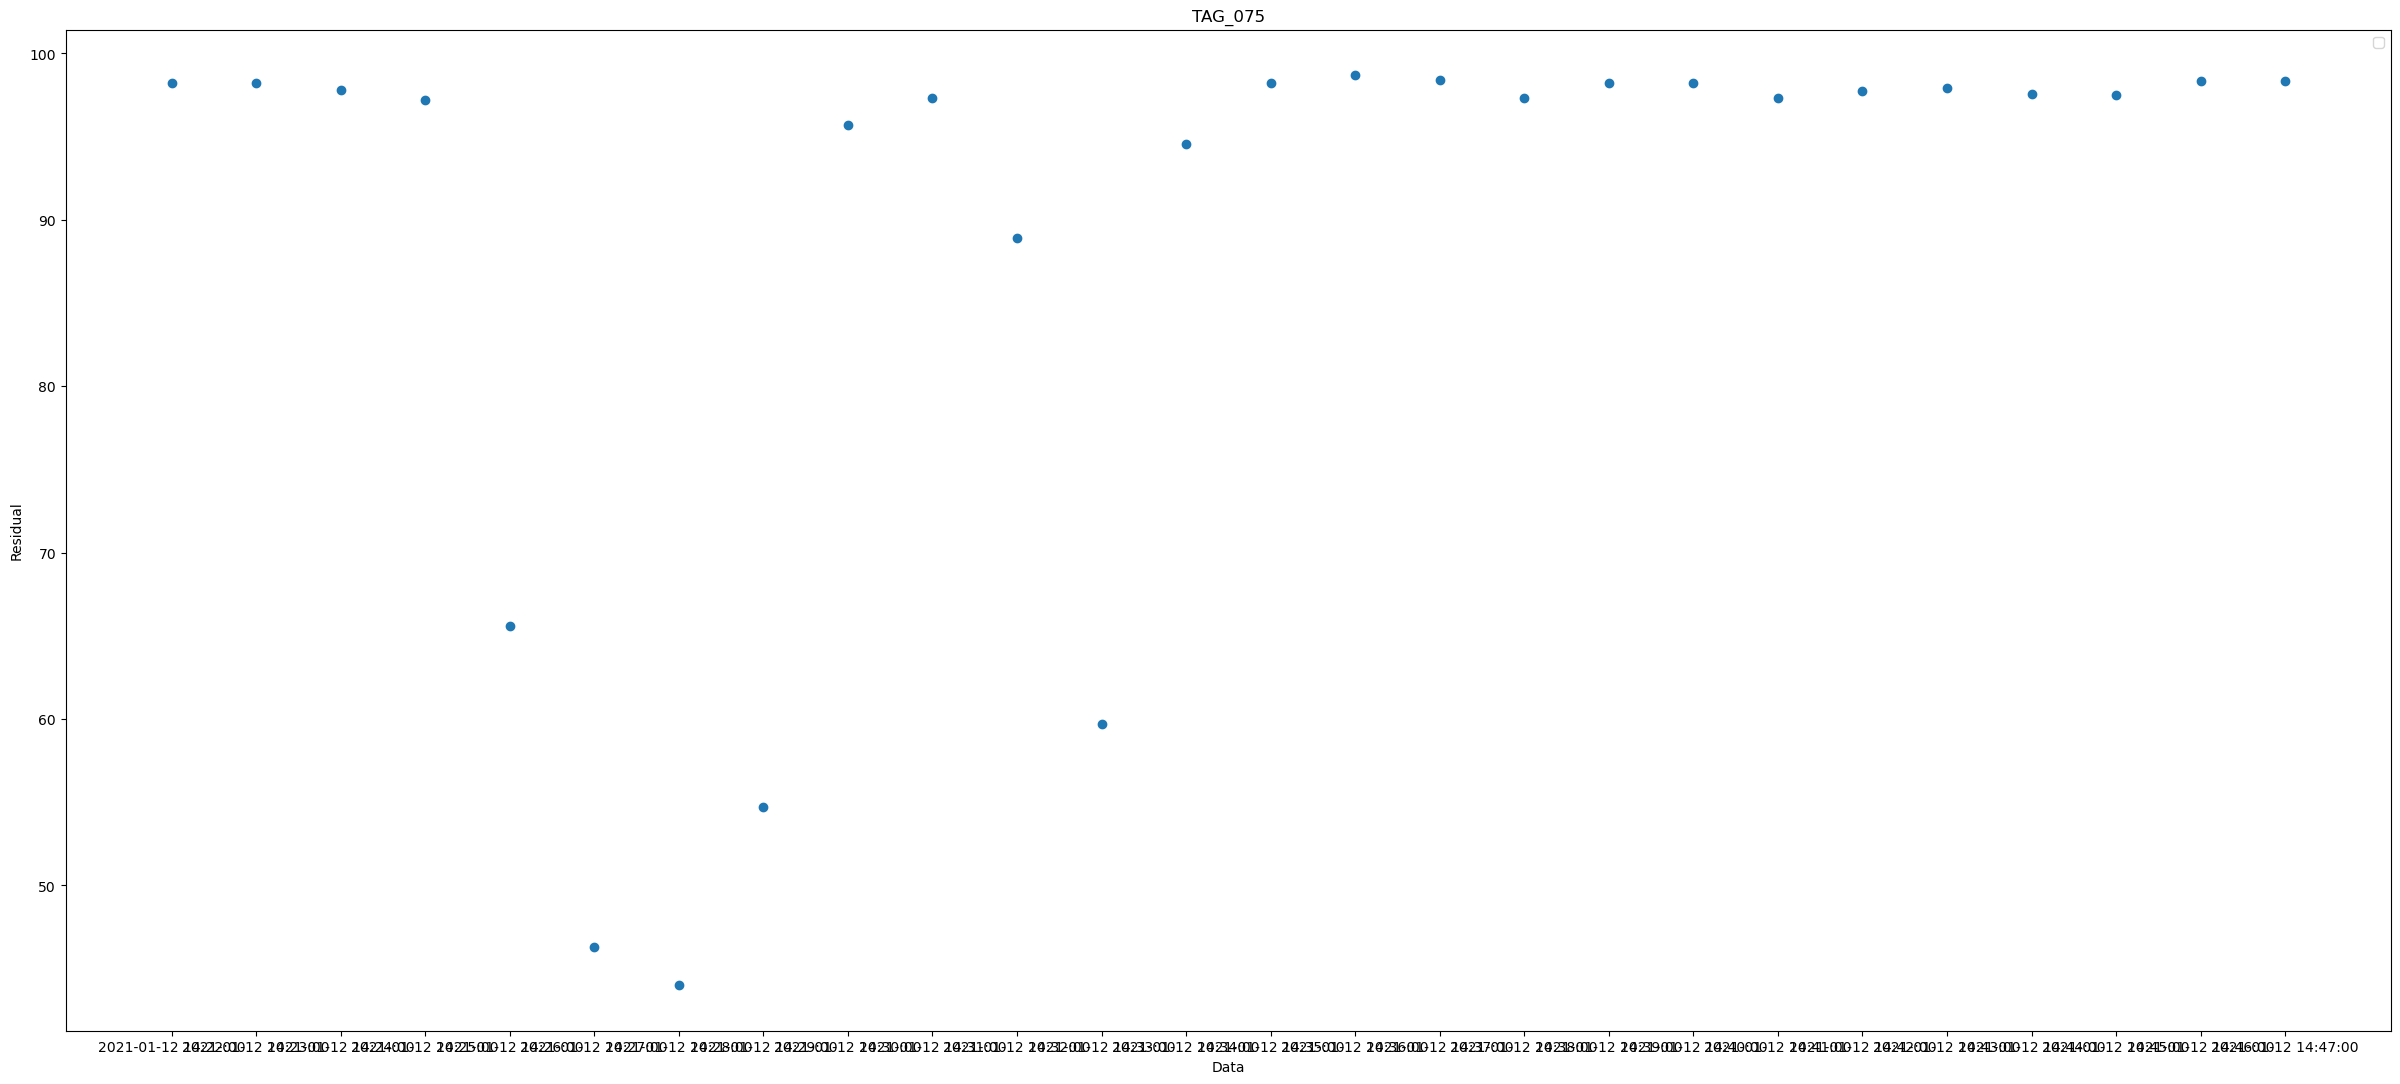

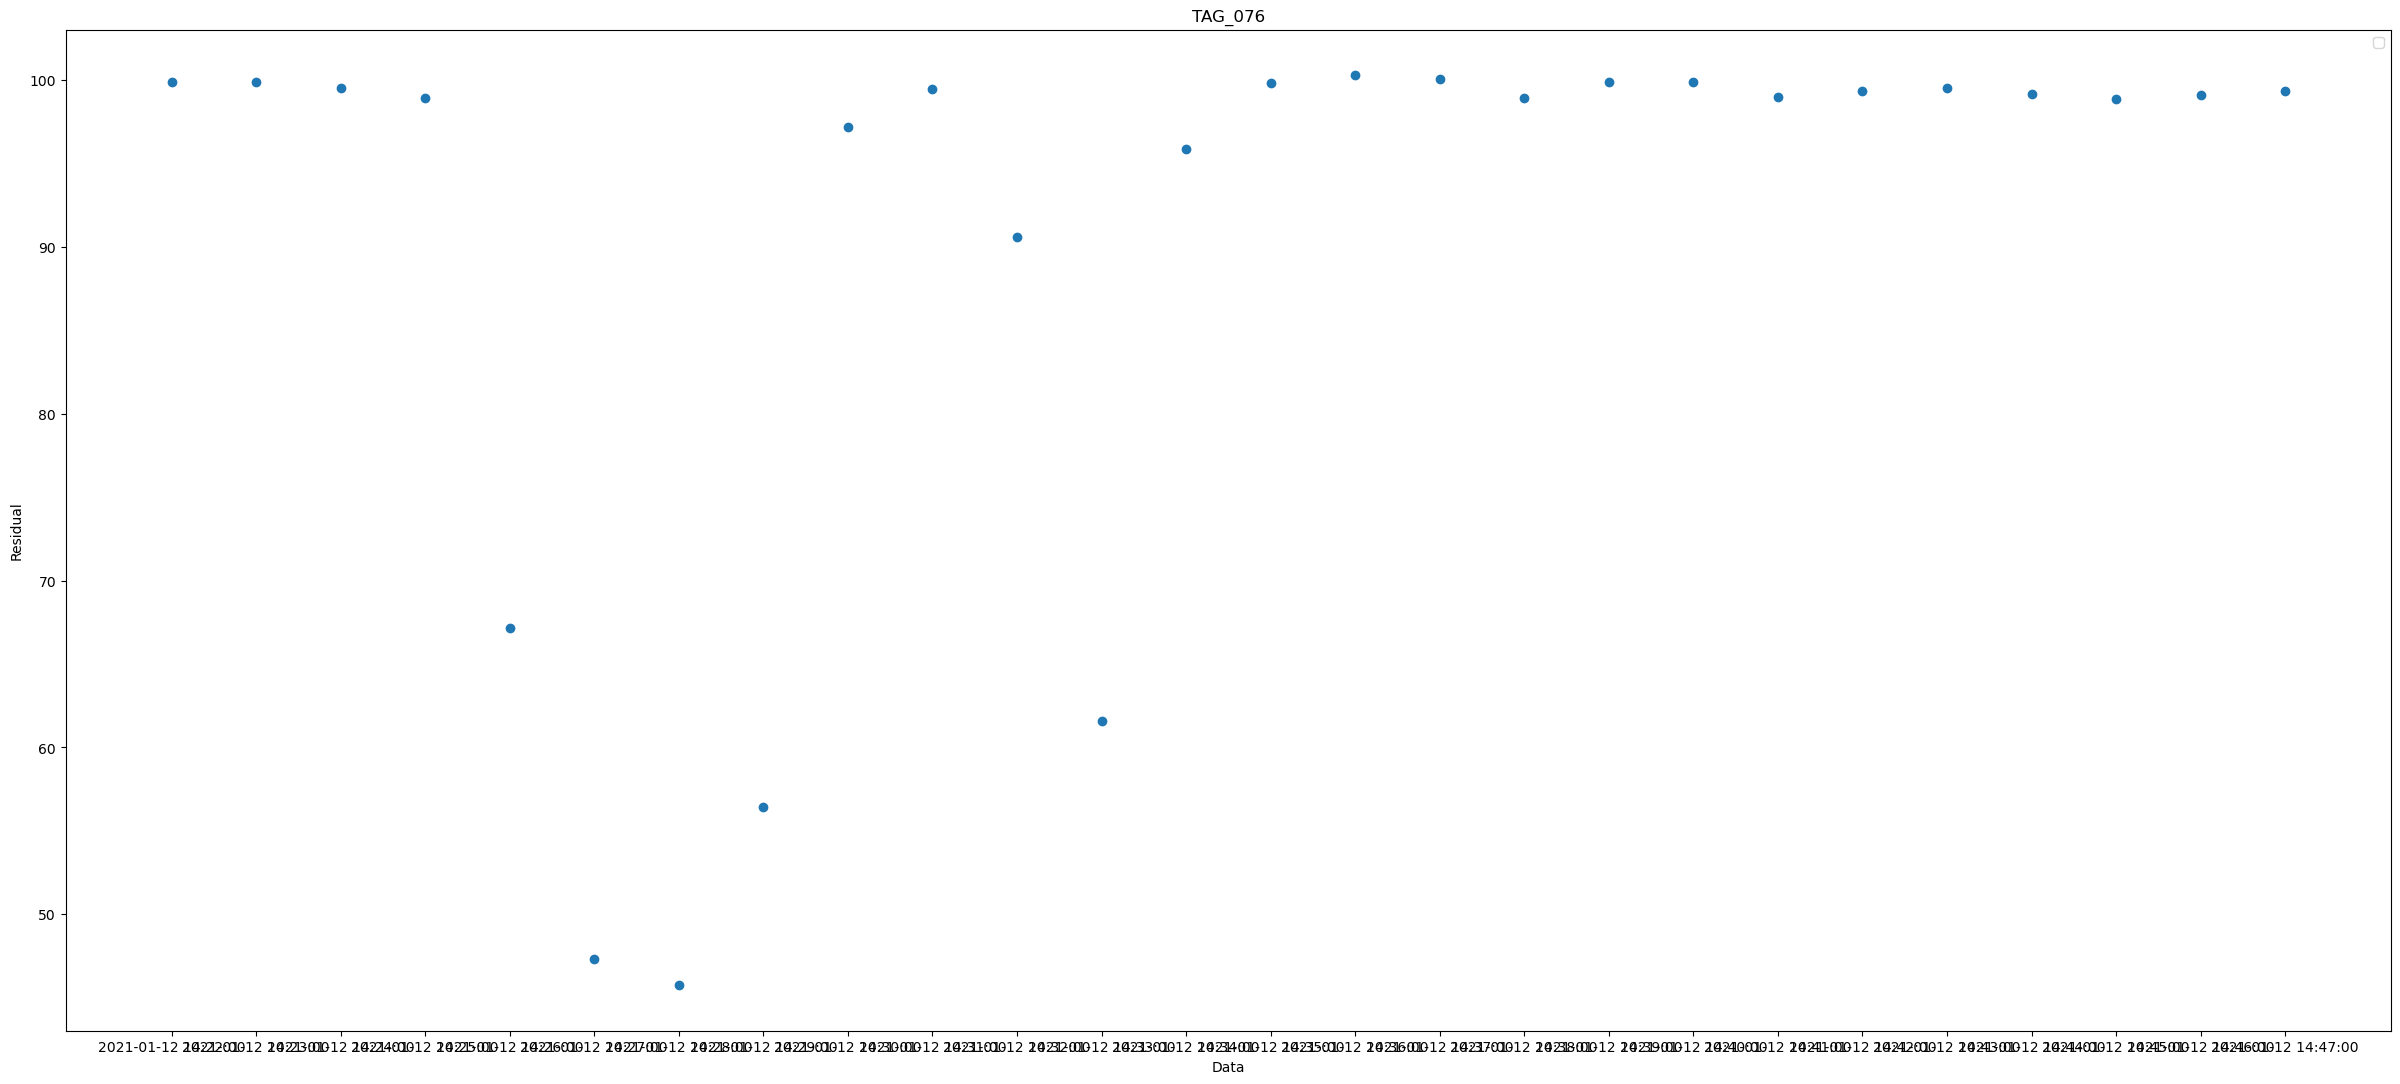

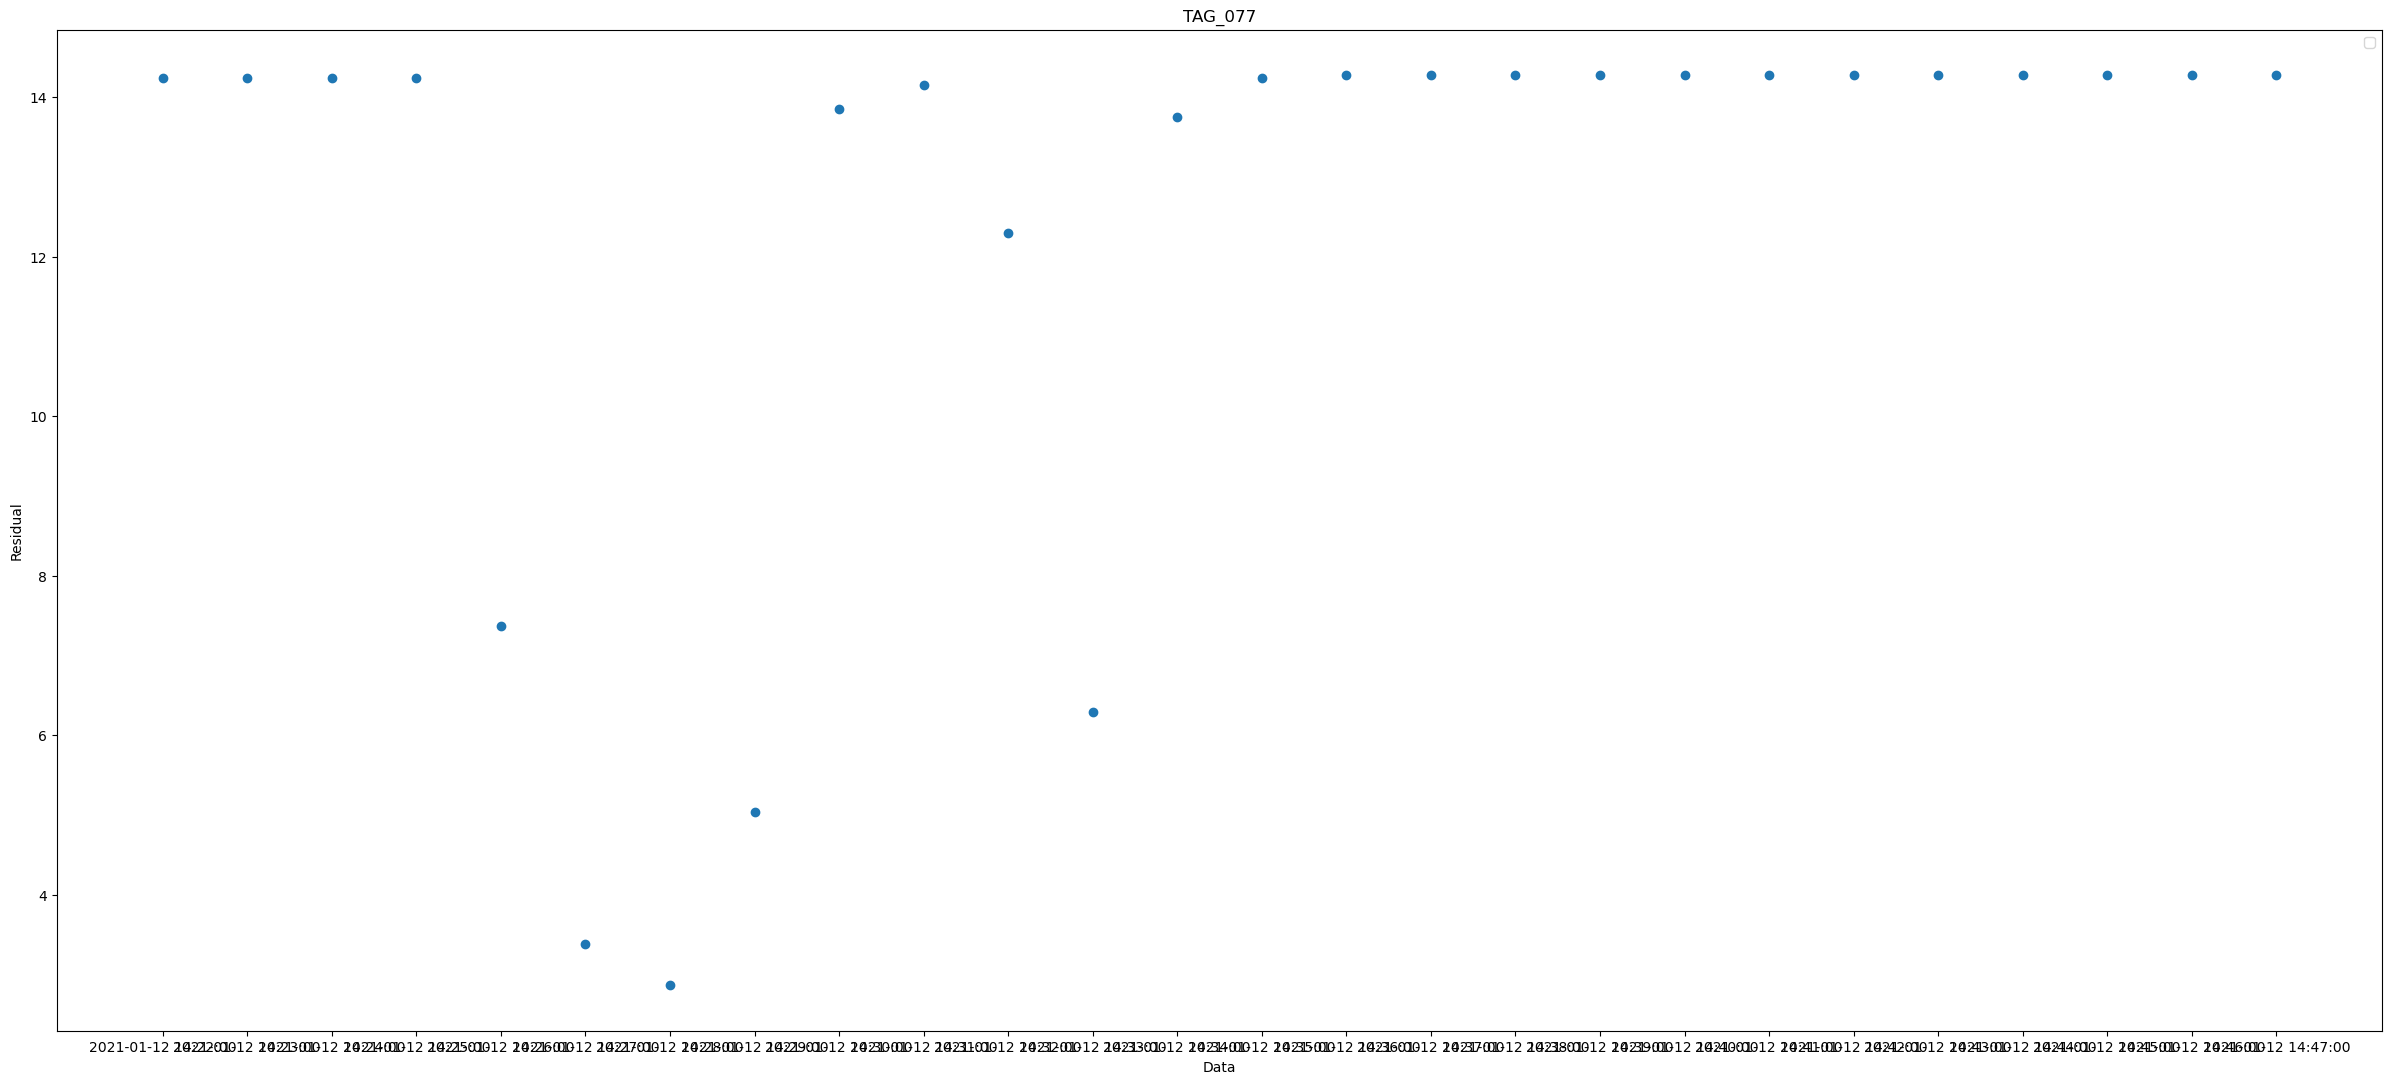

In [143]:
for i in press.drop('datetime', axis=1):
    plt.subplots(figsize=(30,13))
    plt.scatter(press['datetime'], press[i])
    plt.title(i)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.legend()

In [33]:
all_tag[(all_tag['datetime']=='2021-01-11 18:17:00')==True]

,datetime,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,...,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196,cause
16023,2021-01-11 18:17:00,14.776548,3.727987,0.0,3.752683,101.678796,15.723416,0.0,0.0,NaN,...,38.050053,0.480202,0.146601,0.090047,0.011561,66.350983,48.13329,47.706069,48.141048,정상


In [34]:
all_tag[(all_tag['datetime']=='2021-01-11 19:28:00')==True]

,datetime,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,...,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196,cause
16094,2021-01-11 19:28:00,14.785097,3.704752,0.0,3.697932,93.26582,15.766639,0.0,0.0,NaN,...,38.458704,0.616039,0.328181,0.01637,0.012538,66.34494,48.247826,48.925241,48.269954,정상


In [36]:
press3_2 = all_tag.loc[16023:16094, ['datetime','TAG_072','TAG_073','TAG_074','TAG_075','TAG_076','TAG_077','TAG_078']]
press3_2

,datetime,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078
16023,2021-01-11 18:17:00,89.125031,87.006128,8.373612,88.605721,90.362636,12.330914,50.735421
16024,2021-01-11 18:18:00,89.125188,87.006562,8.373703,88.606098,90.365113,12.332567,50.737556
16025,2021-01-11 18:19:00,89.125344,87.006997,8.373794,88.606474,90.367590,12.334219,50.739691
16026,2021-01-11 18:20:00,89.125501,87.007432,8.373886,88.606851,90.370067,12.335872,50.741826
16027,2021-01-11 18:21:00,89.125658,87.007867,8.373977,88.607227,90.372544,12.337524,50.743961
...,...,...,...,...,...,...,...,...
16090,2021-01-11 19:24:00,89.135522,87.035268,8.379718,89.232888,89.530202,12.255139,50.878457
16091,2021-01-11 19:25:00,89.135679,87.035703,8.379809,89.226995,89.538418,12.267653,50.880592
16092,2021-01-11 19:26:00,89.135835,87.036138,8.379900,89.221101,89.546634,12.280167,50.882727
16093,2021-01-11 19:27:00,89.135992,87.036573,8.379991,89.215207,89.554850,12.292681,50.884862


In [ ]:
2021-11-26 19:12:00 	2021-11-26 19:34:00

# 해보는거

In [67]:
all_tag[(all_tag['datetime']=='2021-11-26 17:12:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
471099,2021-11-26 17:12:00,14.682053,3.526735,3.58734,61.885223,21.921963,0.0,0.0,100.0,91.528399,...,40.140377,39.18973,39.672895,38.562086,0.183466,0.29651,0.025158,0.095555,NaN,정상


In [68]:
all_tag[(all_tag['datetime']=='2021-11-26 21:34:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
471361,2021-11-26 21:34:00,14.716922,3.563379,3.549482,47.331475,4.110535,0.053991,0.0,100.0,91.641439,...,40.156986,40.556185,39.125356,37.932199,0.218725,0.227379,0.089463,0.118866,NaN,정상


In [69]:
pre = all_tag.loc[471099:471361, ['datetime','TAG_075','TAG_076','TAG_077']]
pre

,datetime,TAG_075,TAG_076,TAG_077
471099,2021-11-26 17:12:00,97.625389,101.295656,14.020466
471100,2021-11-26 17:13:00,97.625389,101.295581,14.020463
471101,2021-11-26 17:14:00,97.625389,101.295506,14.020459
471102,2021-11-26 17:15:00,97.625389,101.295432,14.020455
471103,2021-11-26 17:16:00,97.625389,101.295358,14.020451
...,...,...,...,...
471357,2021-11-26 21:30:00,97.590179,101.227351,13.980178
471358,2021-11-26 21:31:00,97.590307,101.227462,13.980302
471359,2021-11-26 21:32:00,97.590435,101.227572,13.980427
471360,2021-11-26 21:33:00,97.590562,101.227683,13.980551


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


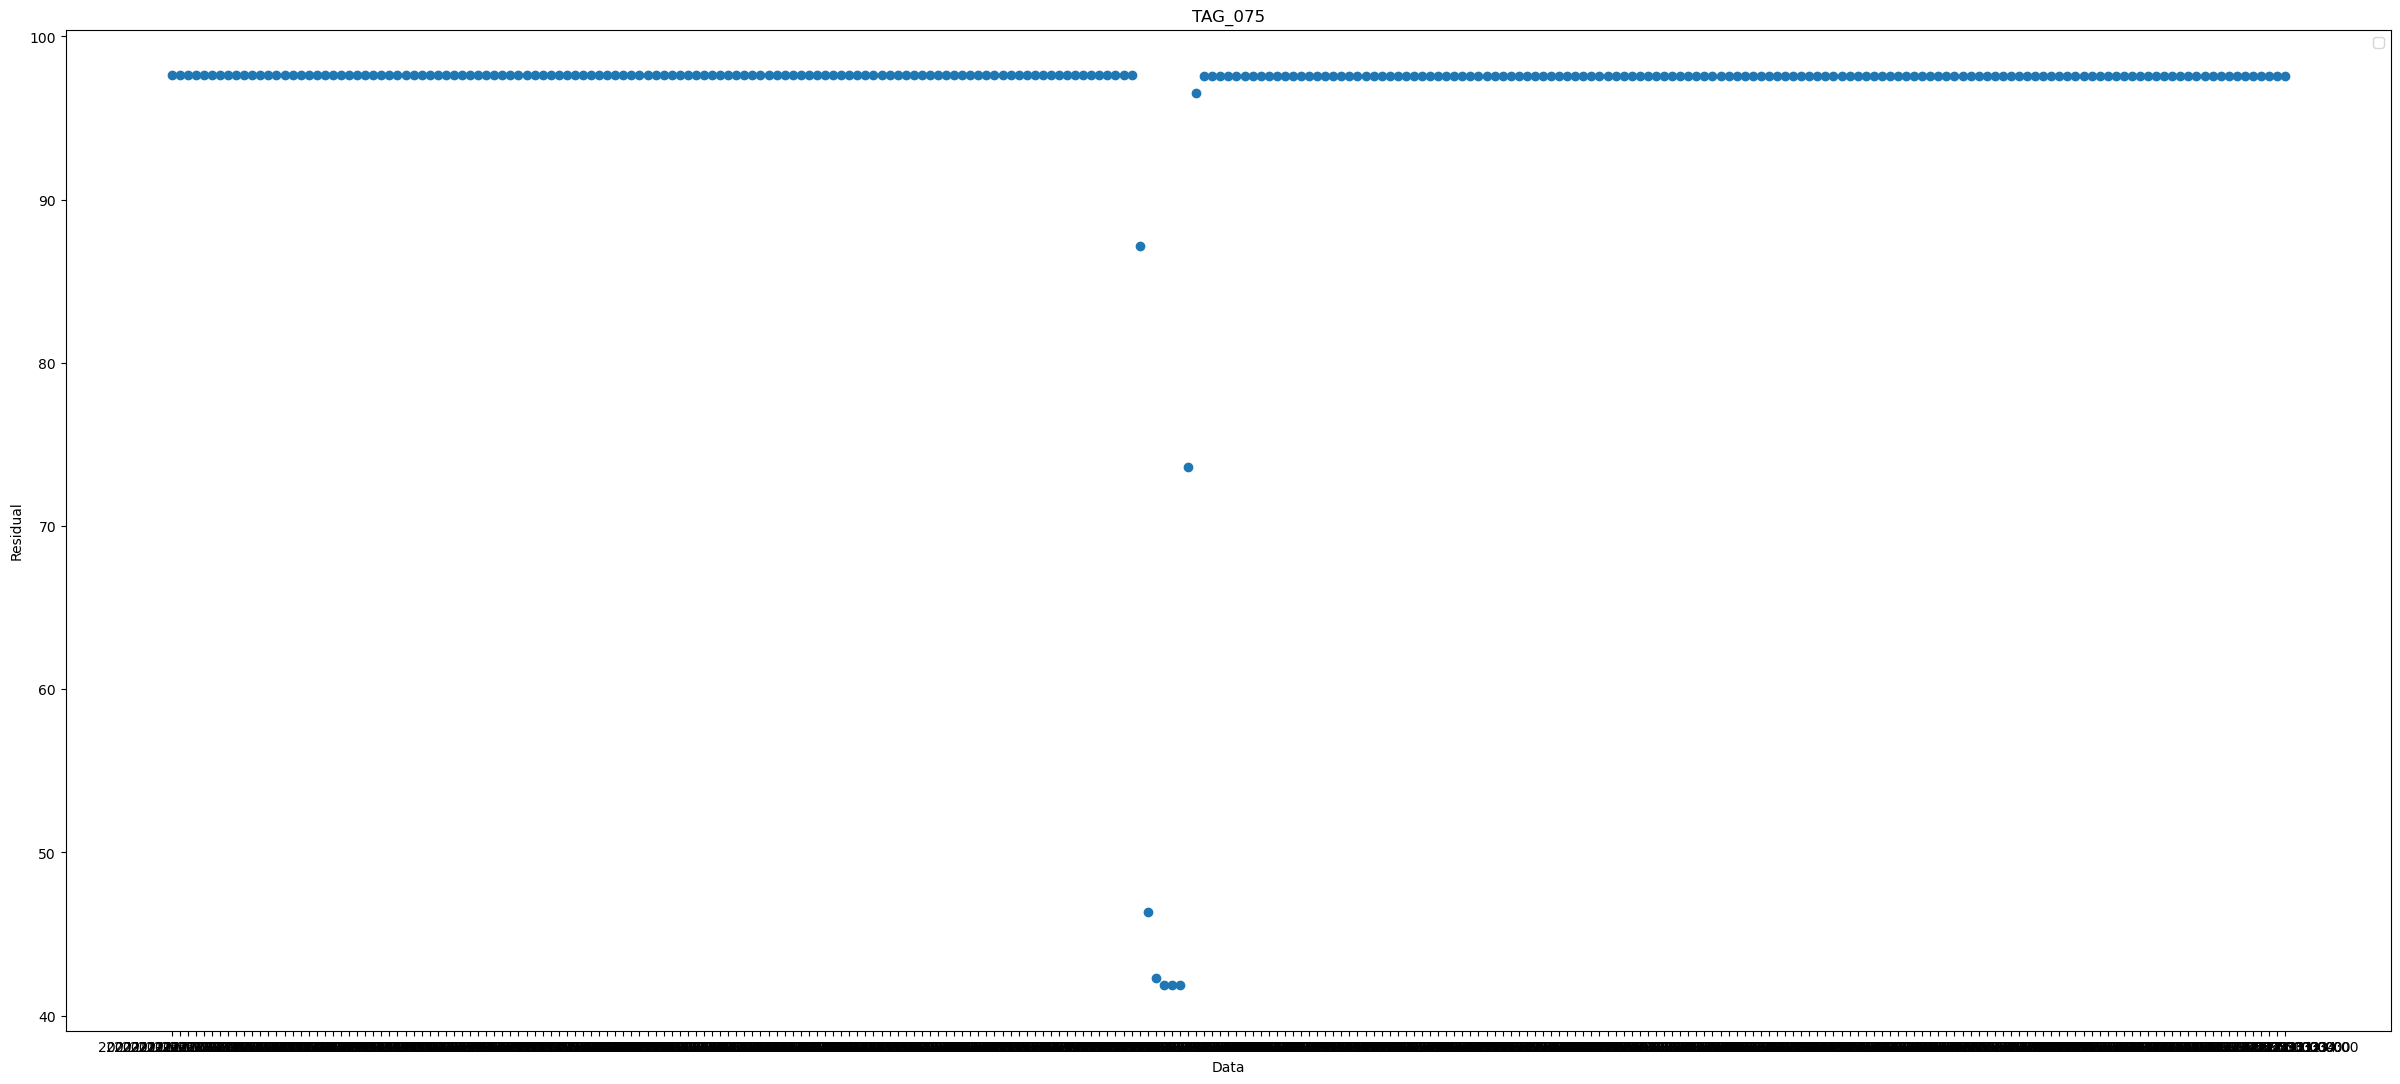

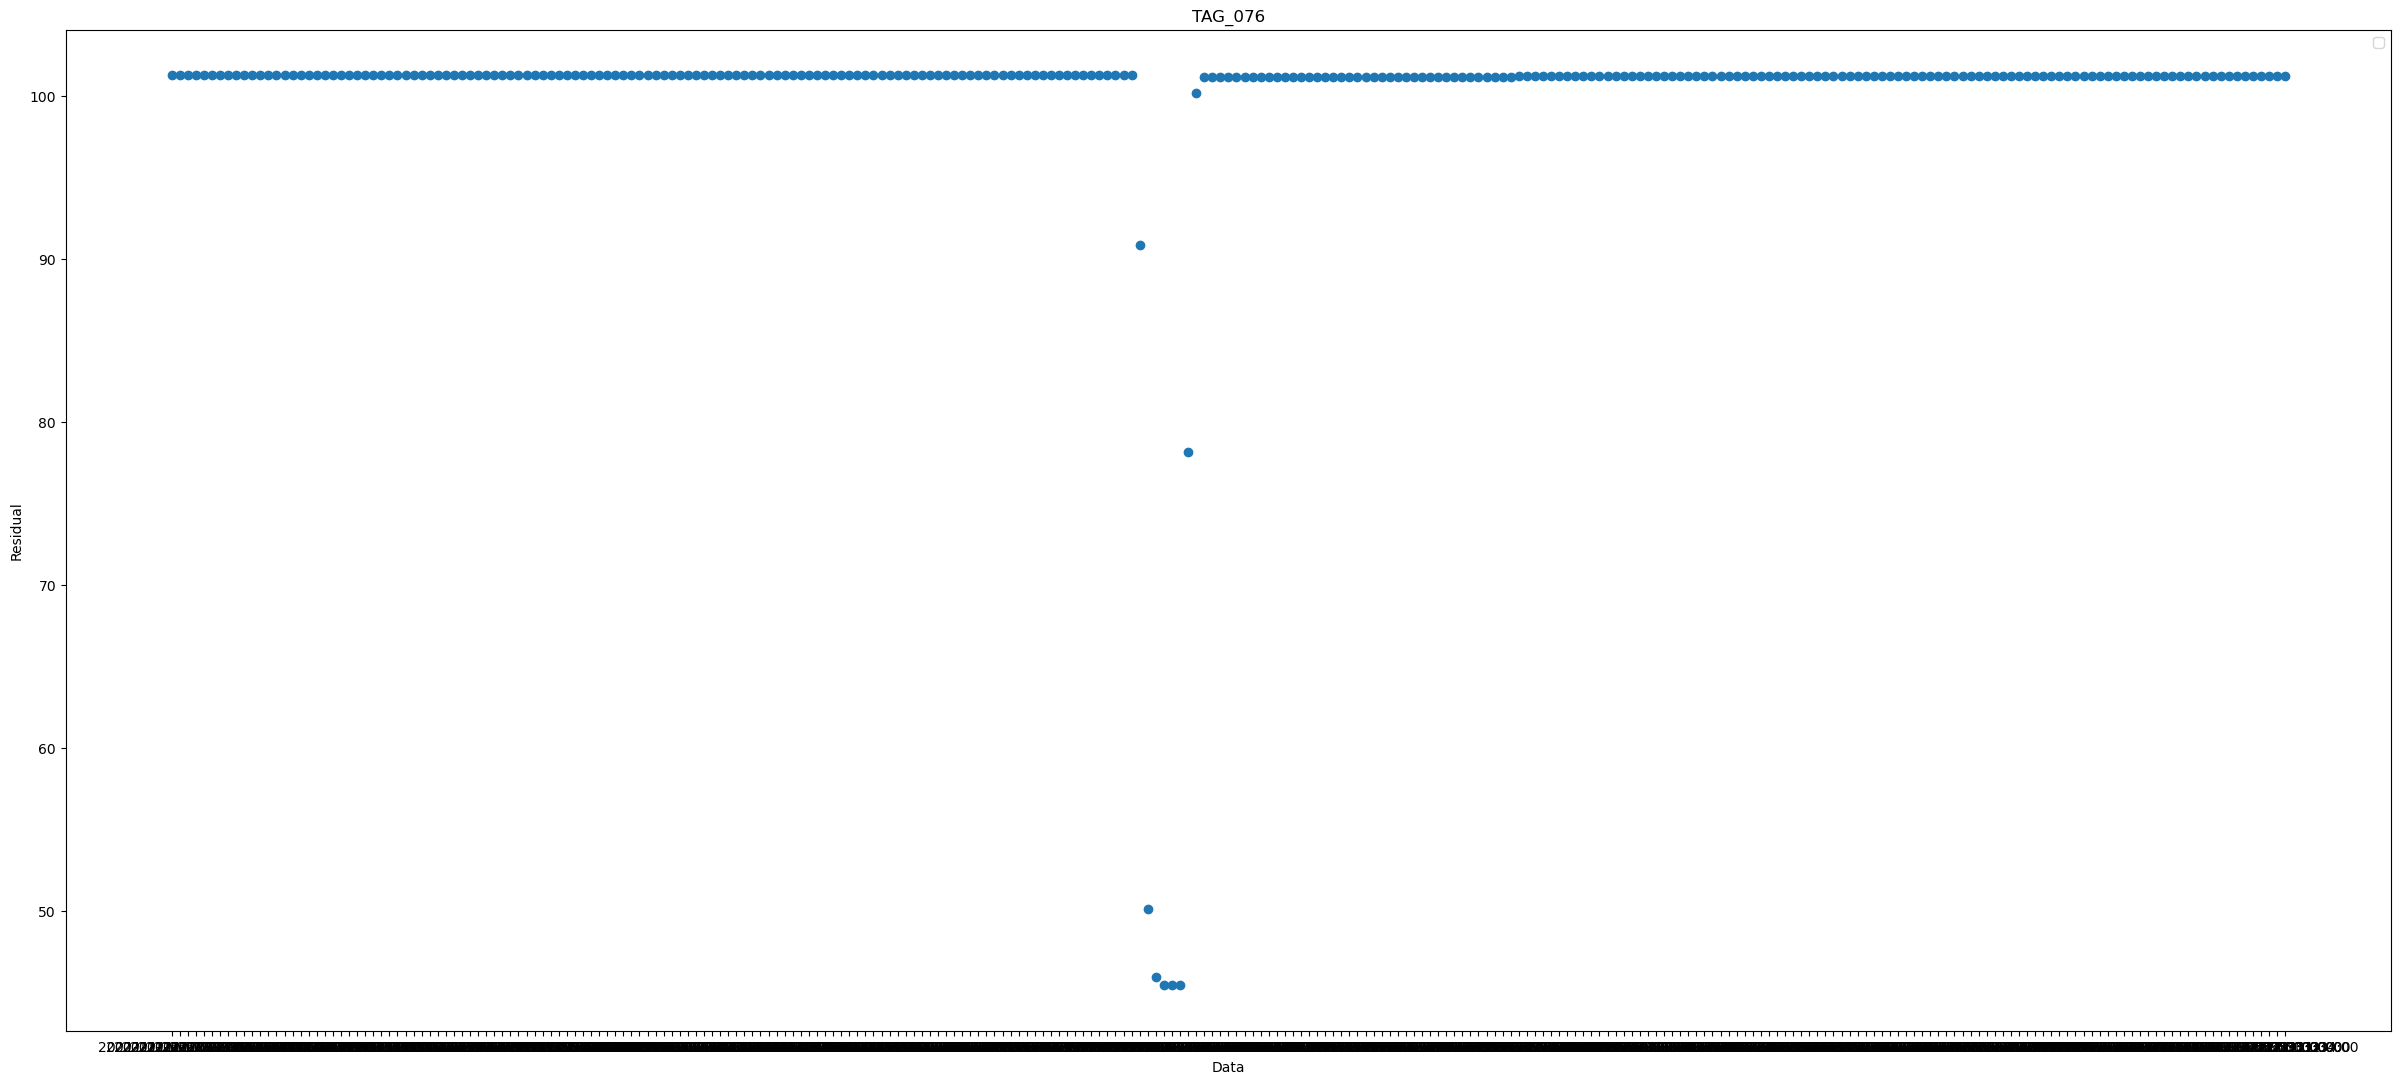

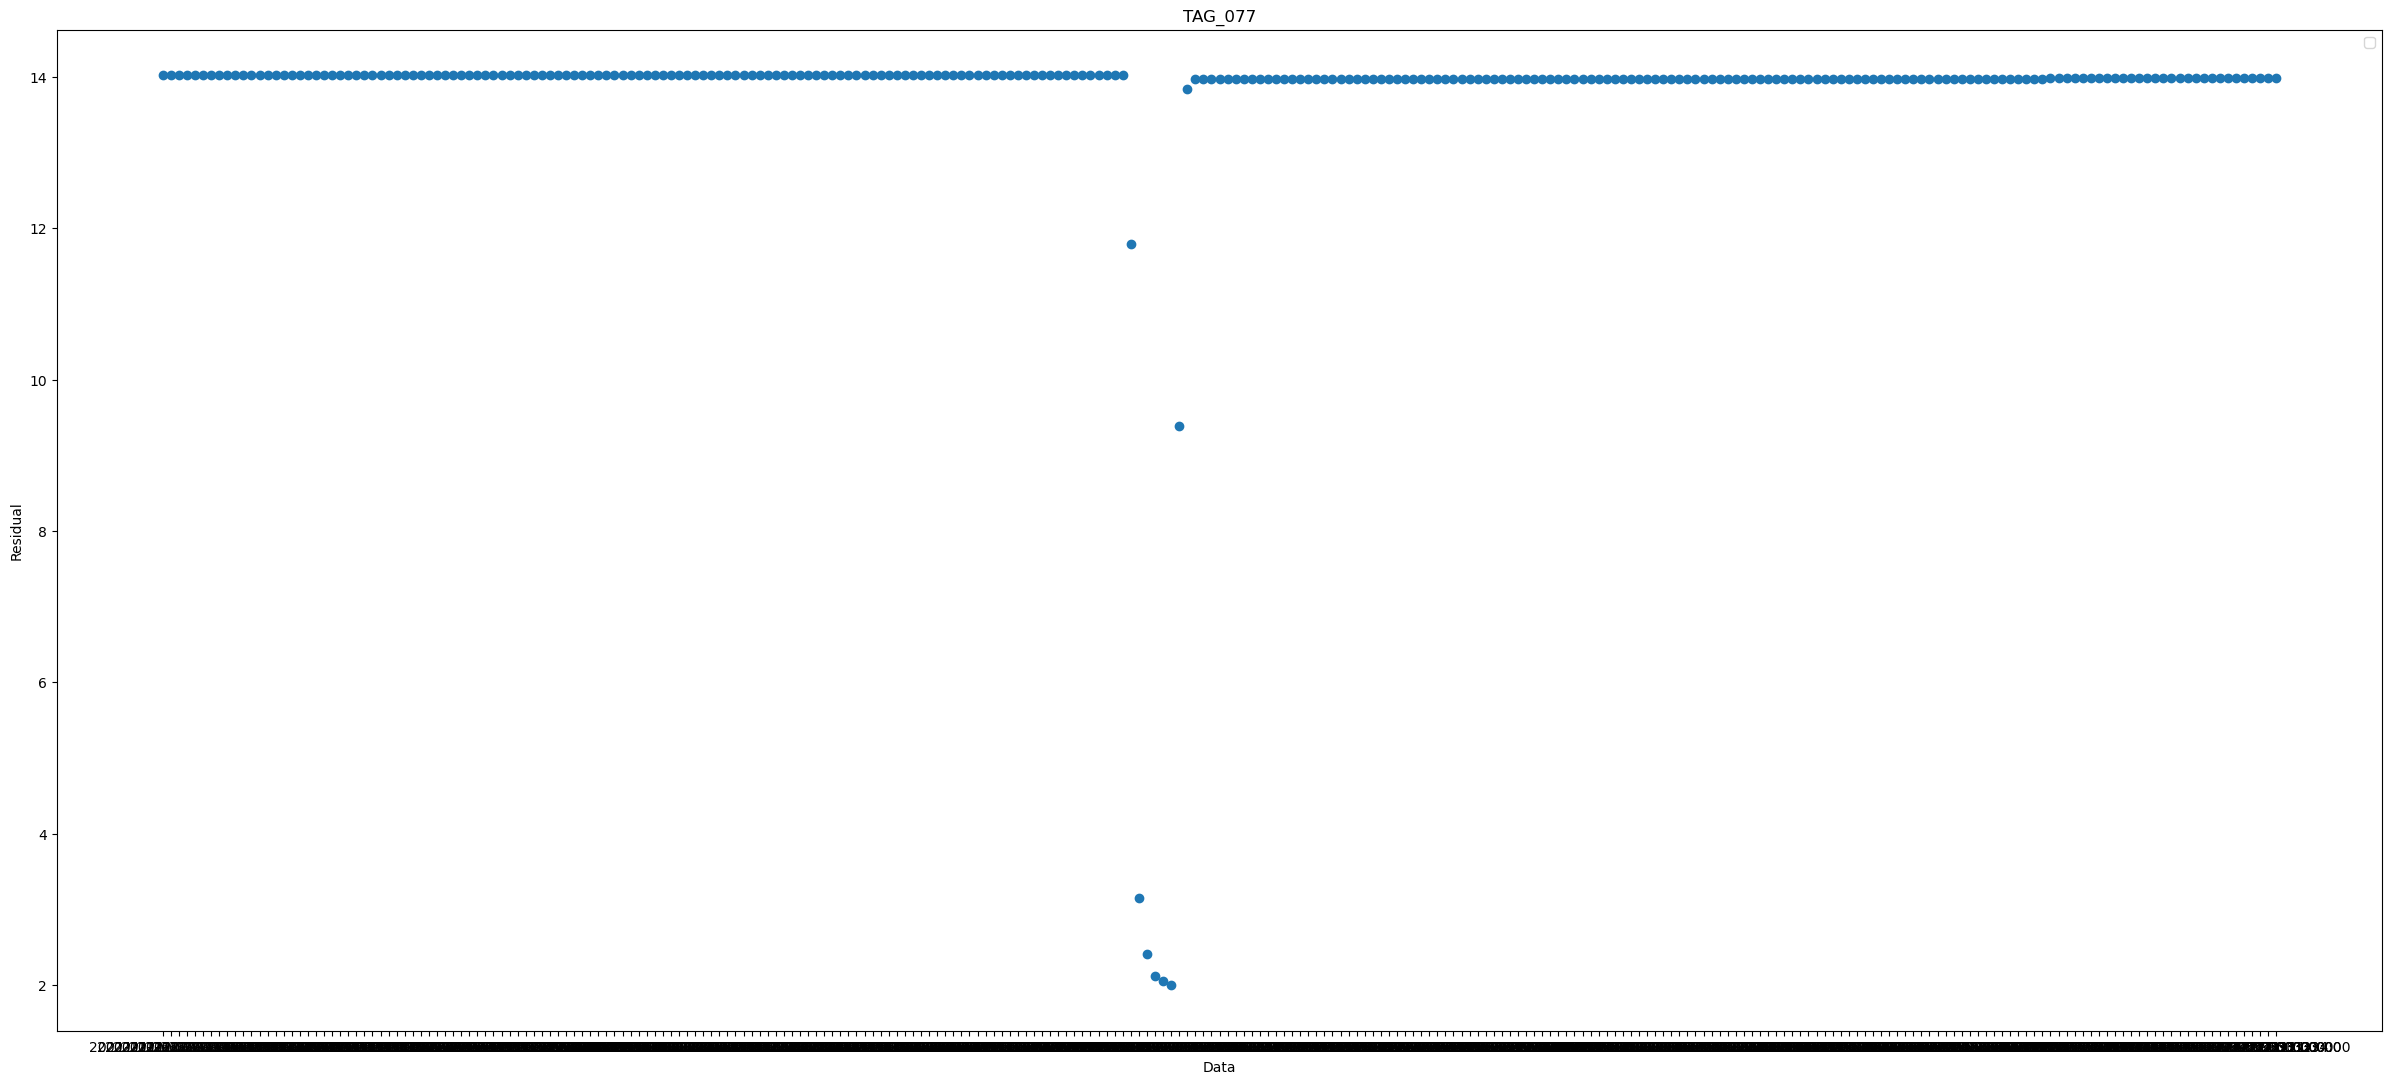

In [70]:
for i in pre.drop('datetime', axis=1):
    plt.subplots(figsize=(30,13))
    plt.scatter(pre['datetime'], pre[i])
    plt.title(i)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.legend()

# 끝

## 종류 섞인거 시작

In [ ]:
2021-01-03 21:39:00	
        2021-01-03 22:24:00


In [109]:
all_tag[(all_tag['datetime']=='2021-01-03 21:19:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
4685,2021-01-03 21:19:00,14.855114,3.755673,3.747404,65.932164,16.214512,0.0,0.0,100.0,92.832196,...,34.988387,39.121229,40.04782,30.535151,0.159751,0.416388,0.062572,0.101969,71.475798,정상


In [110]:
all_tag[(all_tag['datetime']=='2021-01-03 22:44:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
4770,2021-01-03 22:44:00,14.898846,3.631391,3.710336,88.466236,16.18405,0.0,0.0,100.0,92.609316,...,42.439592,39.899498,41.361308,38.408798,0.034647,0.402193,0.057636,0.09894,70.360807,정상


In [111]:
pre = all_tag.loc[4685:4770, ['datetime','TAG_075','TAG_076','TAG_077']]
pre

,datetime,TAG_075,TAG_076,TAG_077
4685,2021-01-03 21:19:00,98.149597,99.801984,14.227802
4686,2021-01-03 21:20:00,98.151868,99.802603,14.229919
4687,2021-01-03 21:21:00,98.154140,99.803223,14.232036
4688,2021-01-03 21:22:00,98.156412,99.803842,14.234153
4689,2021-01-03 21:23:00,98.158683,99.804462,14.236270
...,...,...,...,...
4766,2021-01-03 22:40:00,98.136095,99.807419,14.180811
4767,2021-01-03 22:41:00,98.136185,99.807419,14.181022
4768,2021-01-03 22:42:00,98.136276,99.807419,14.181232
4769,2021-01-03 22:43:00,98.136367,99.807419,14.181443


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


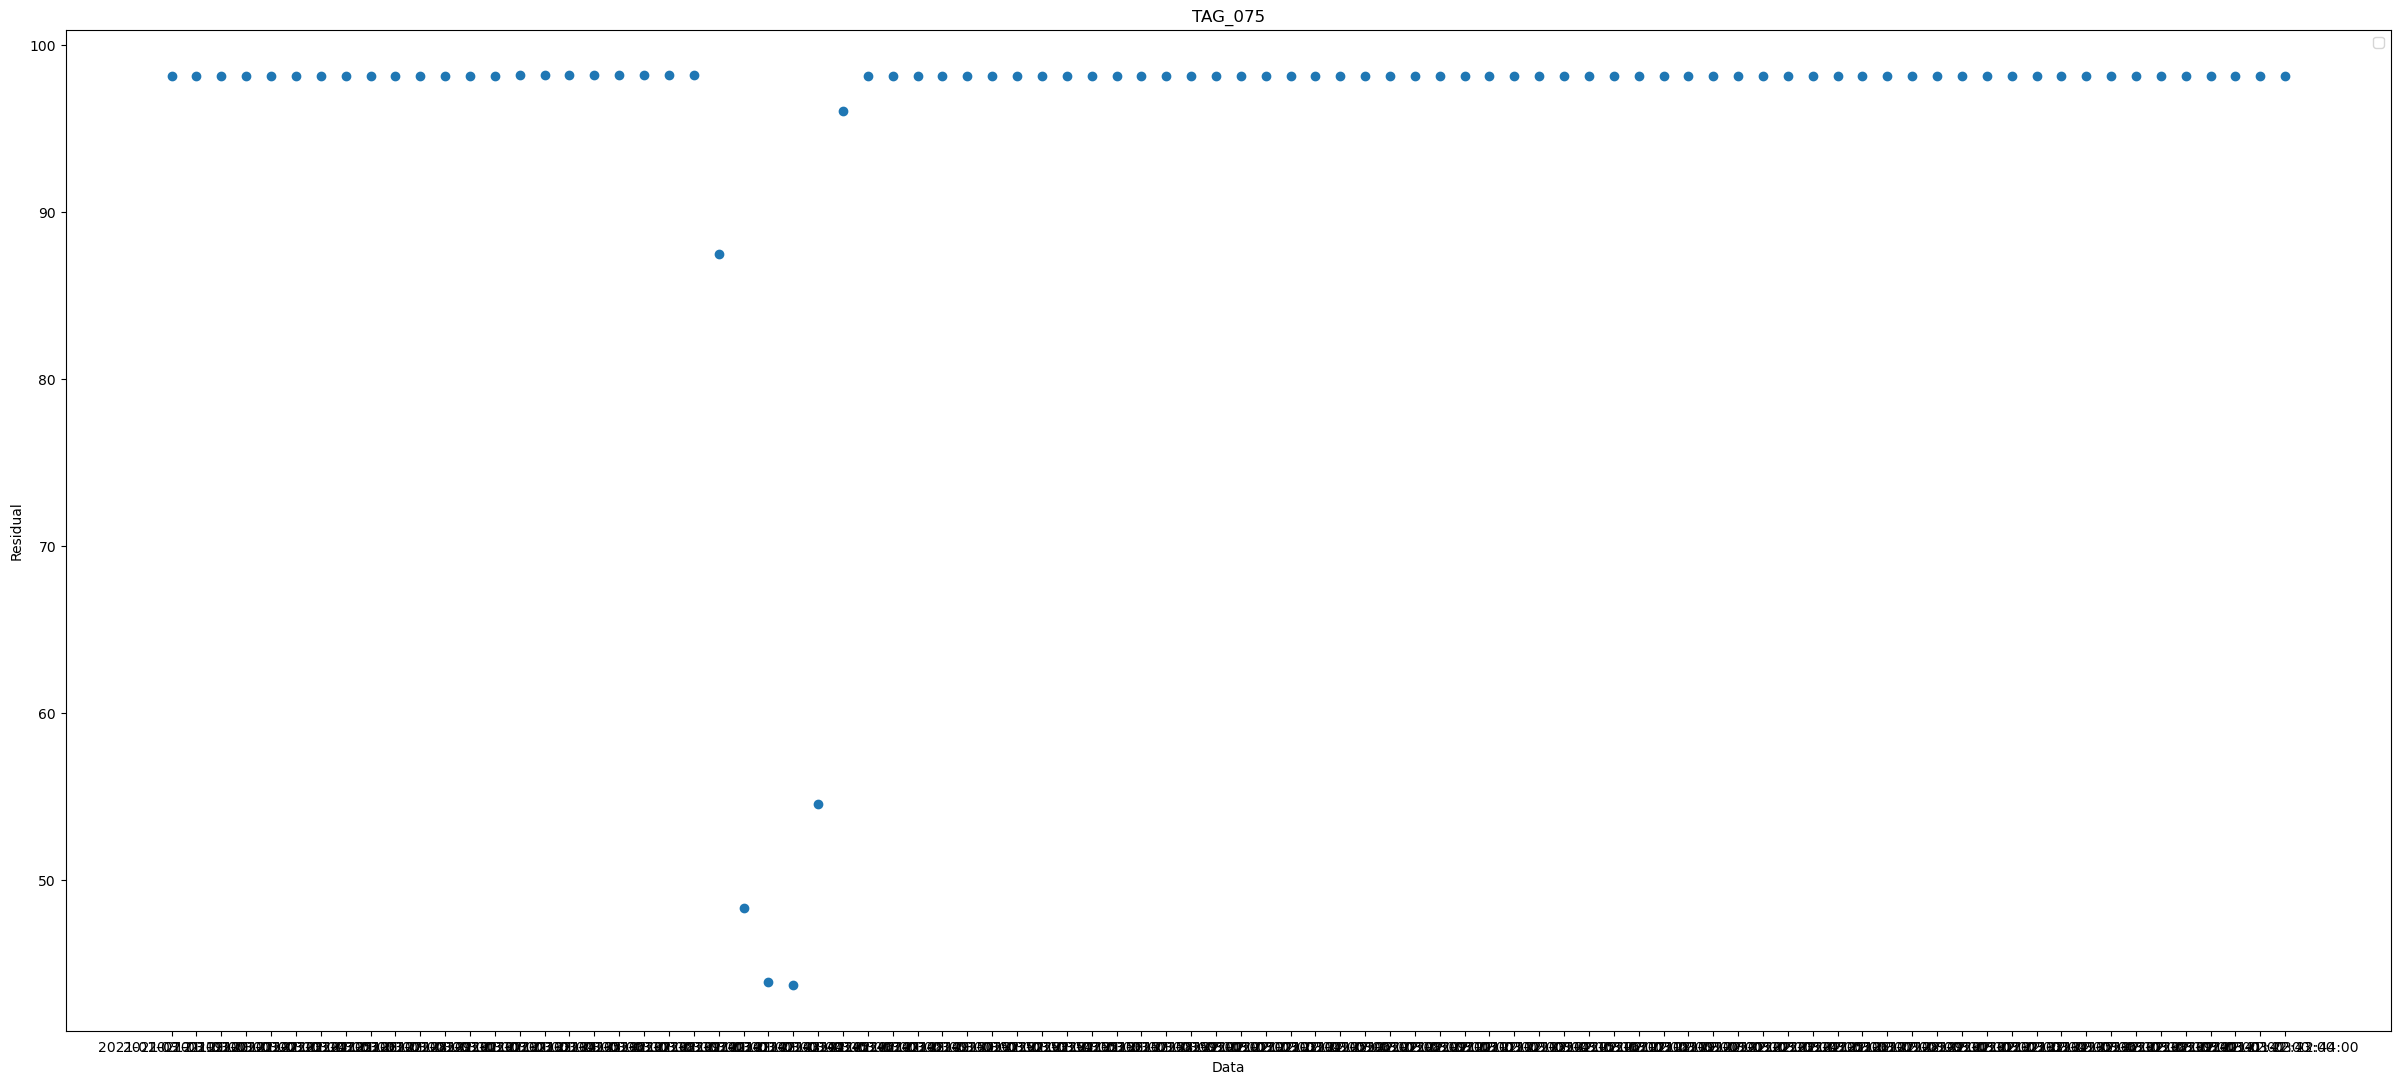

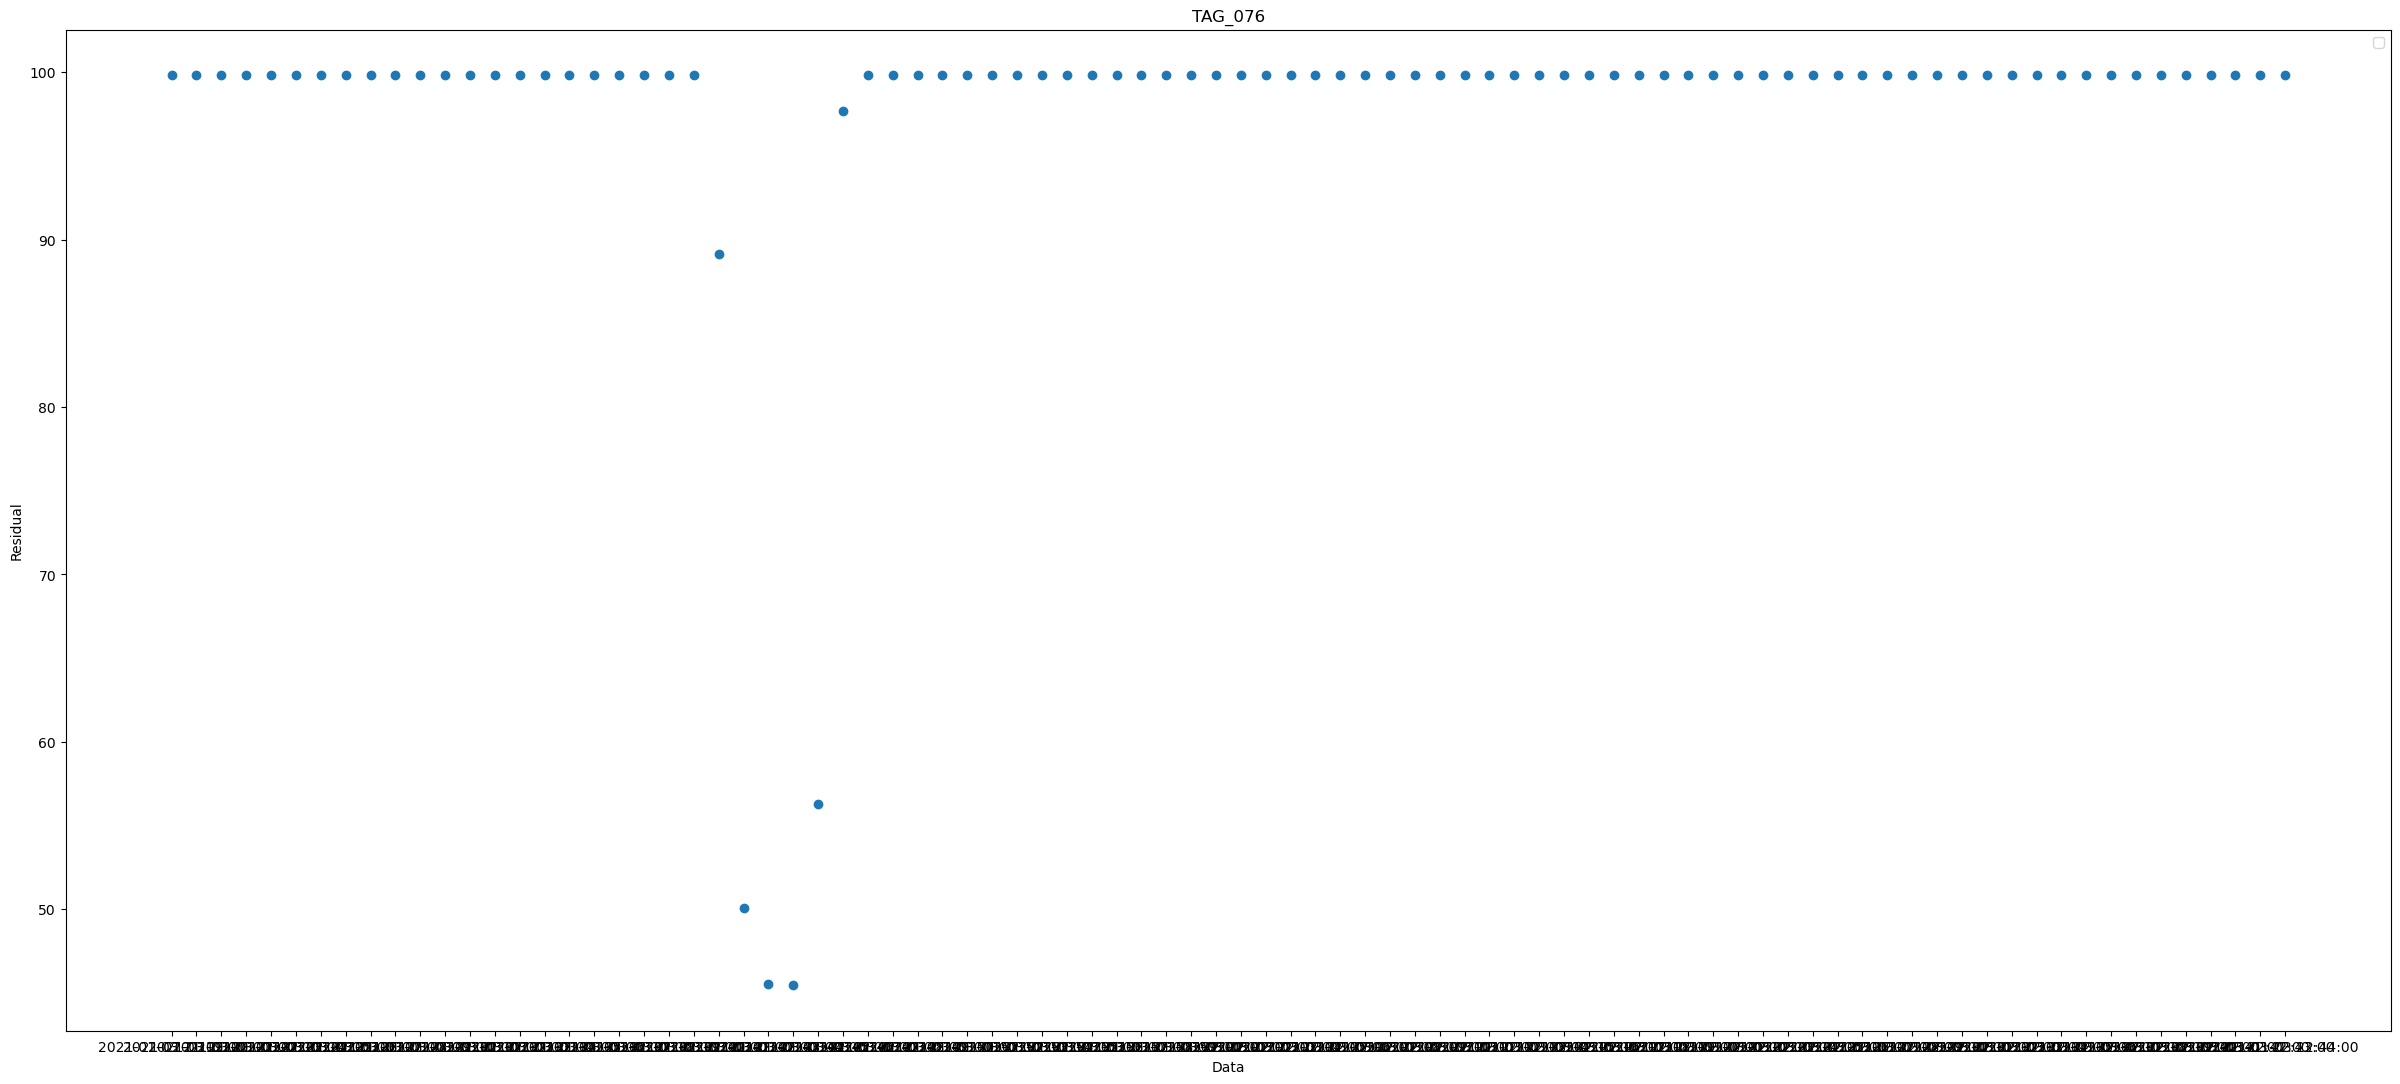

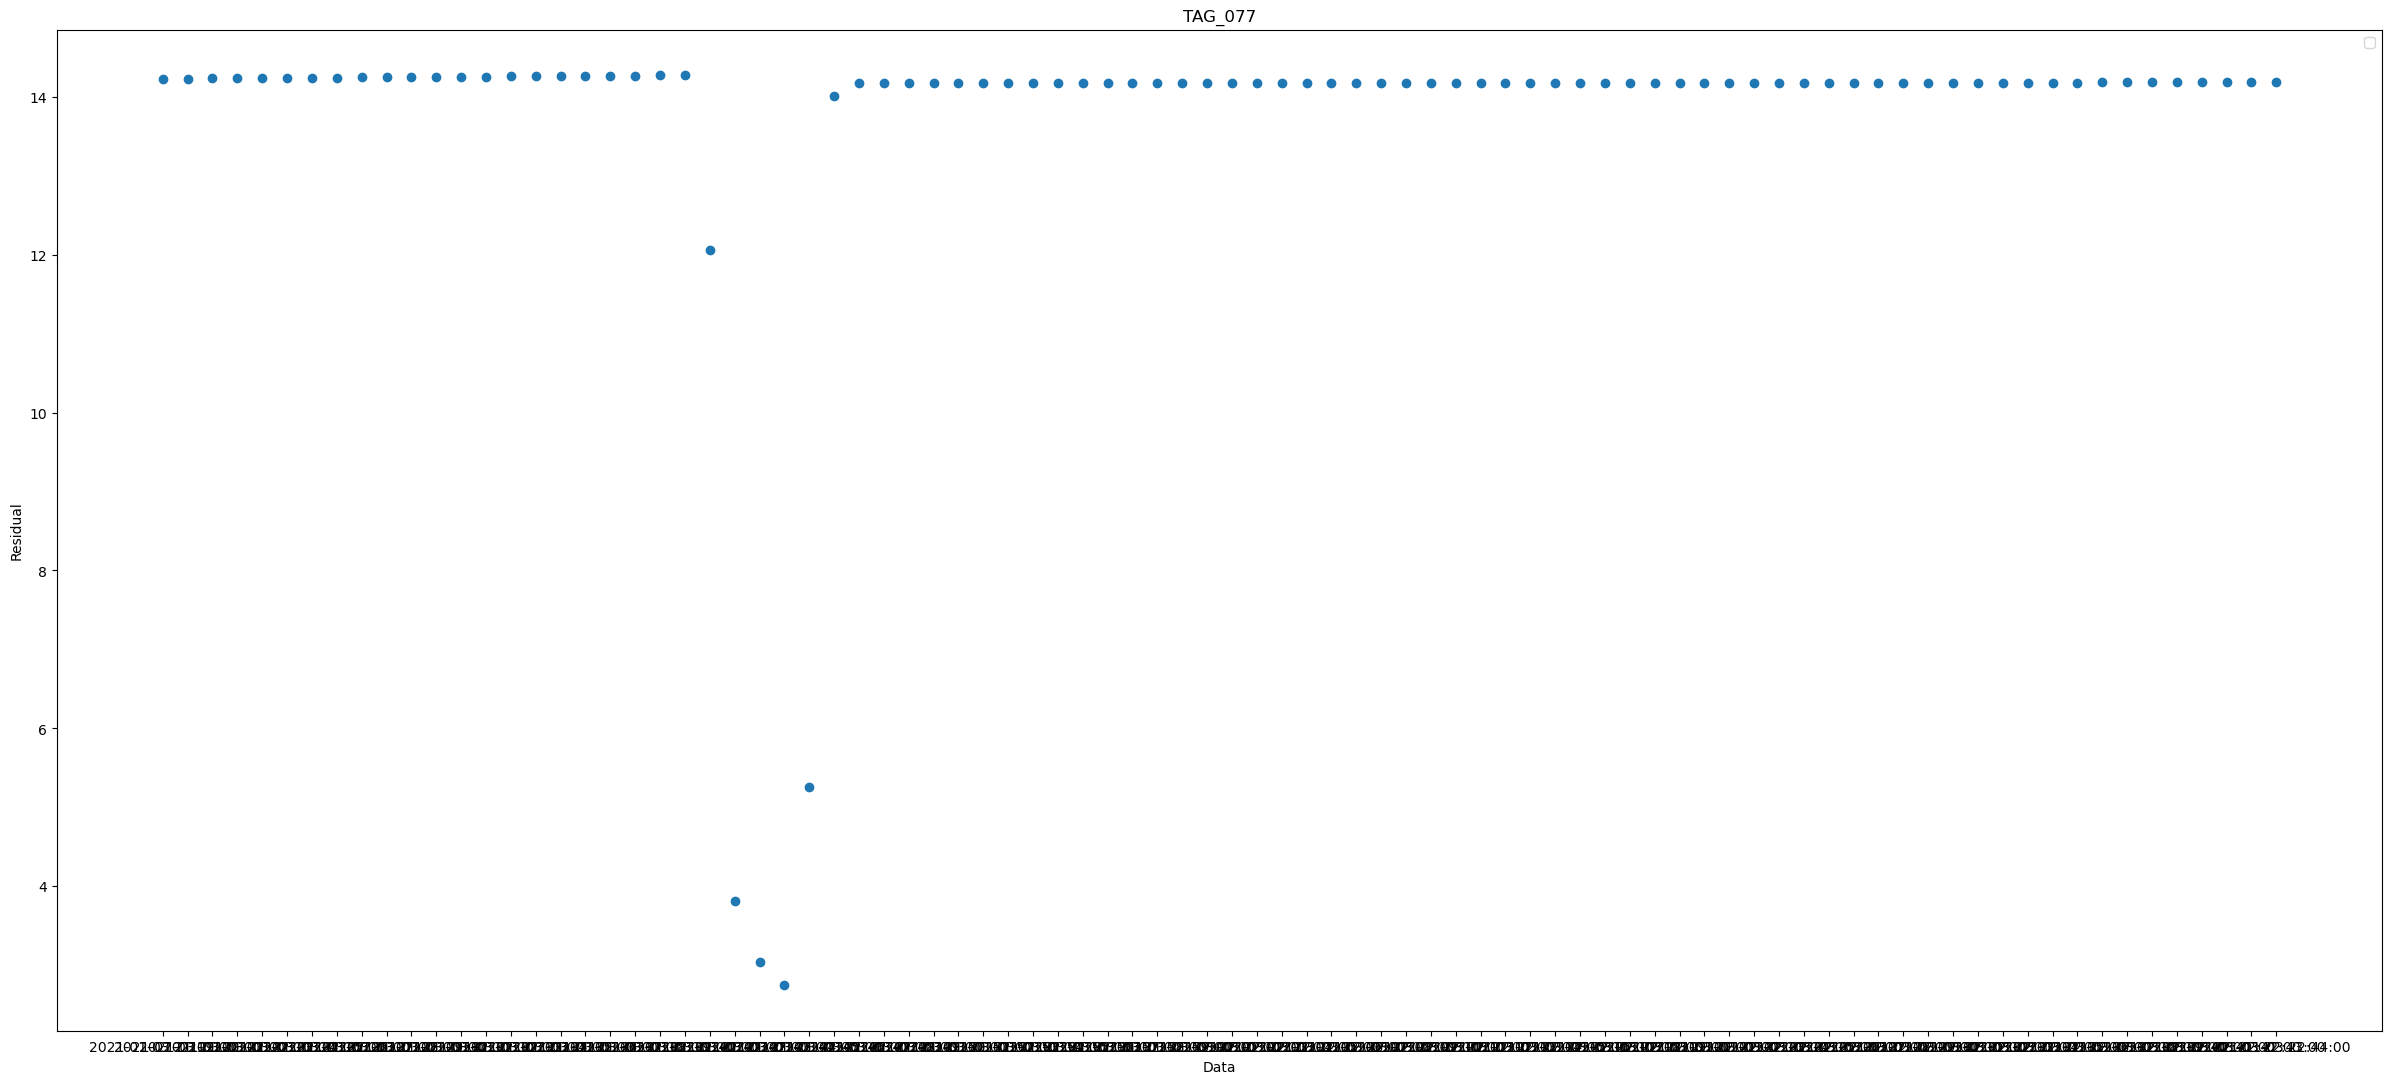

In [112]:
for i in pre.drop('datetime', axis=1):
    plt.subplots(figsize=(30,13))
    plt.scatter(pre['datetime'], pre[i])
    plt.title(i)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

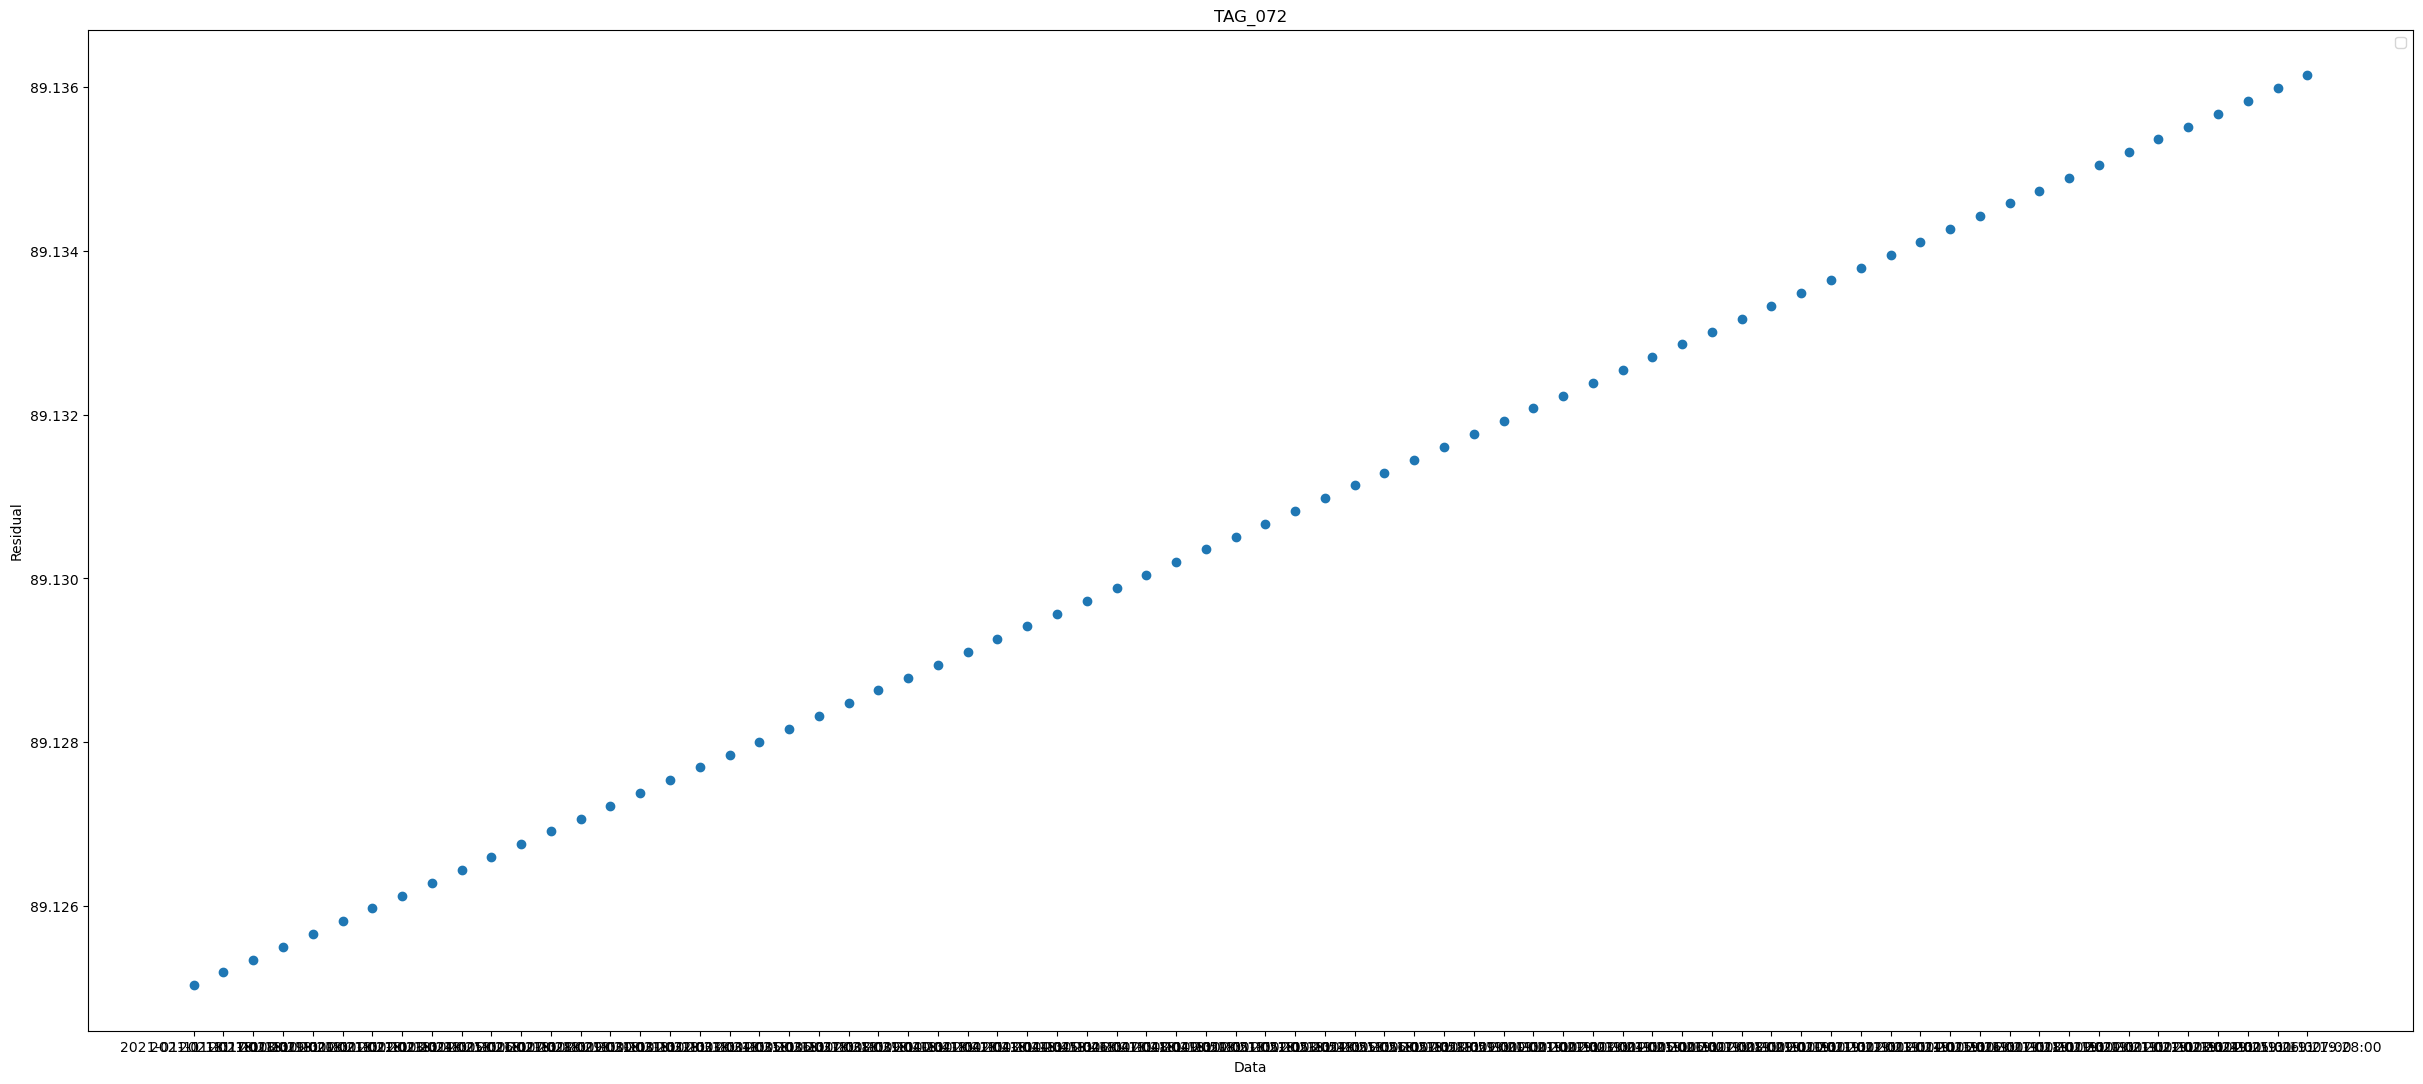

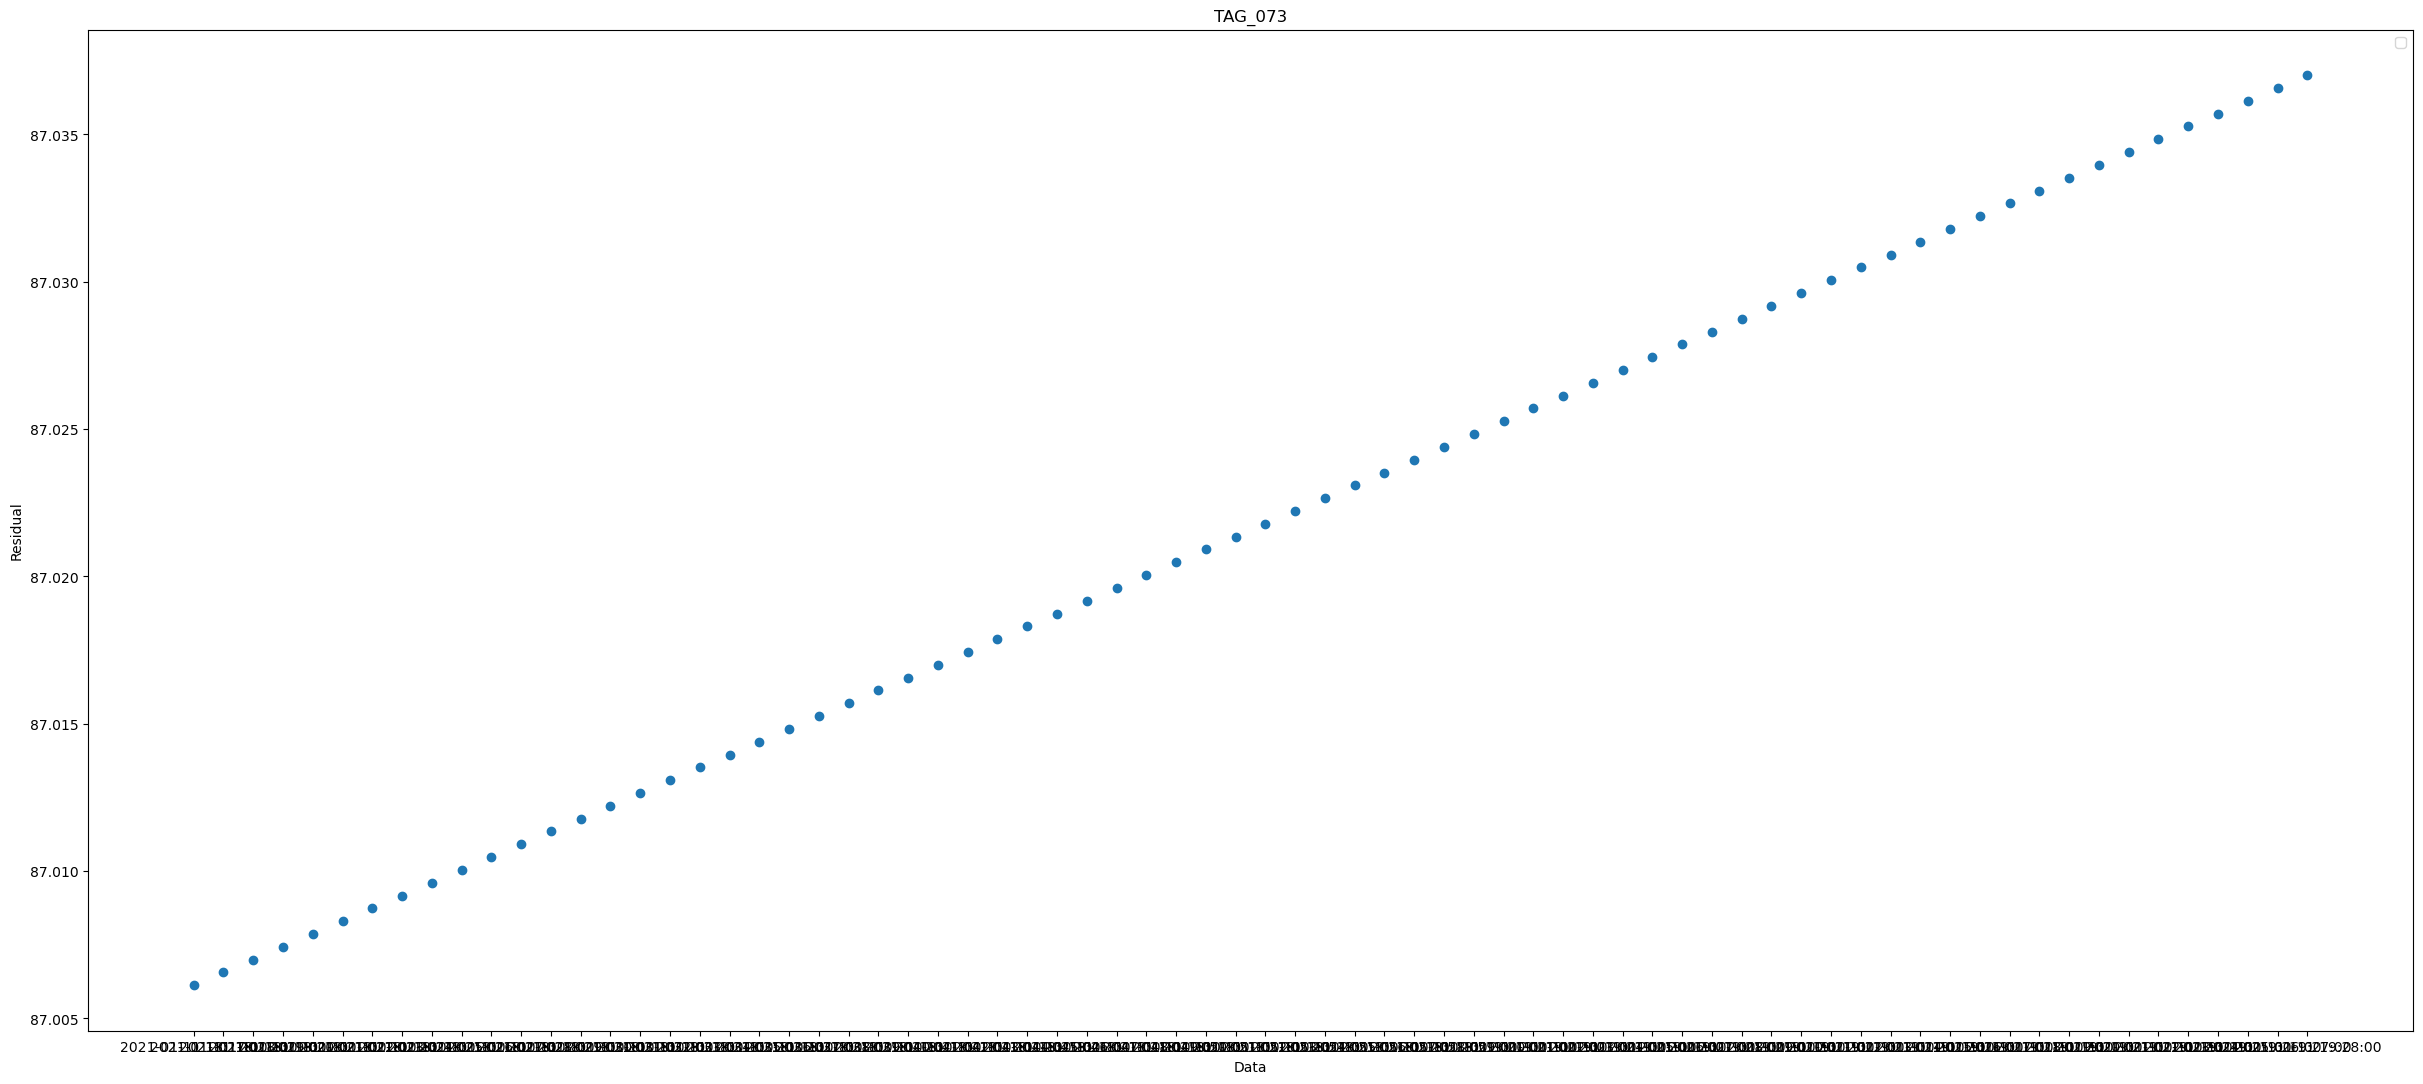

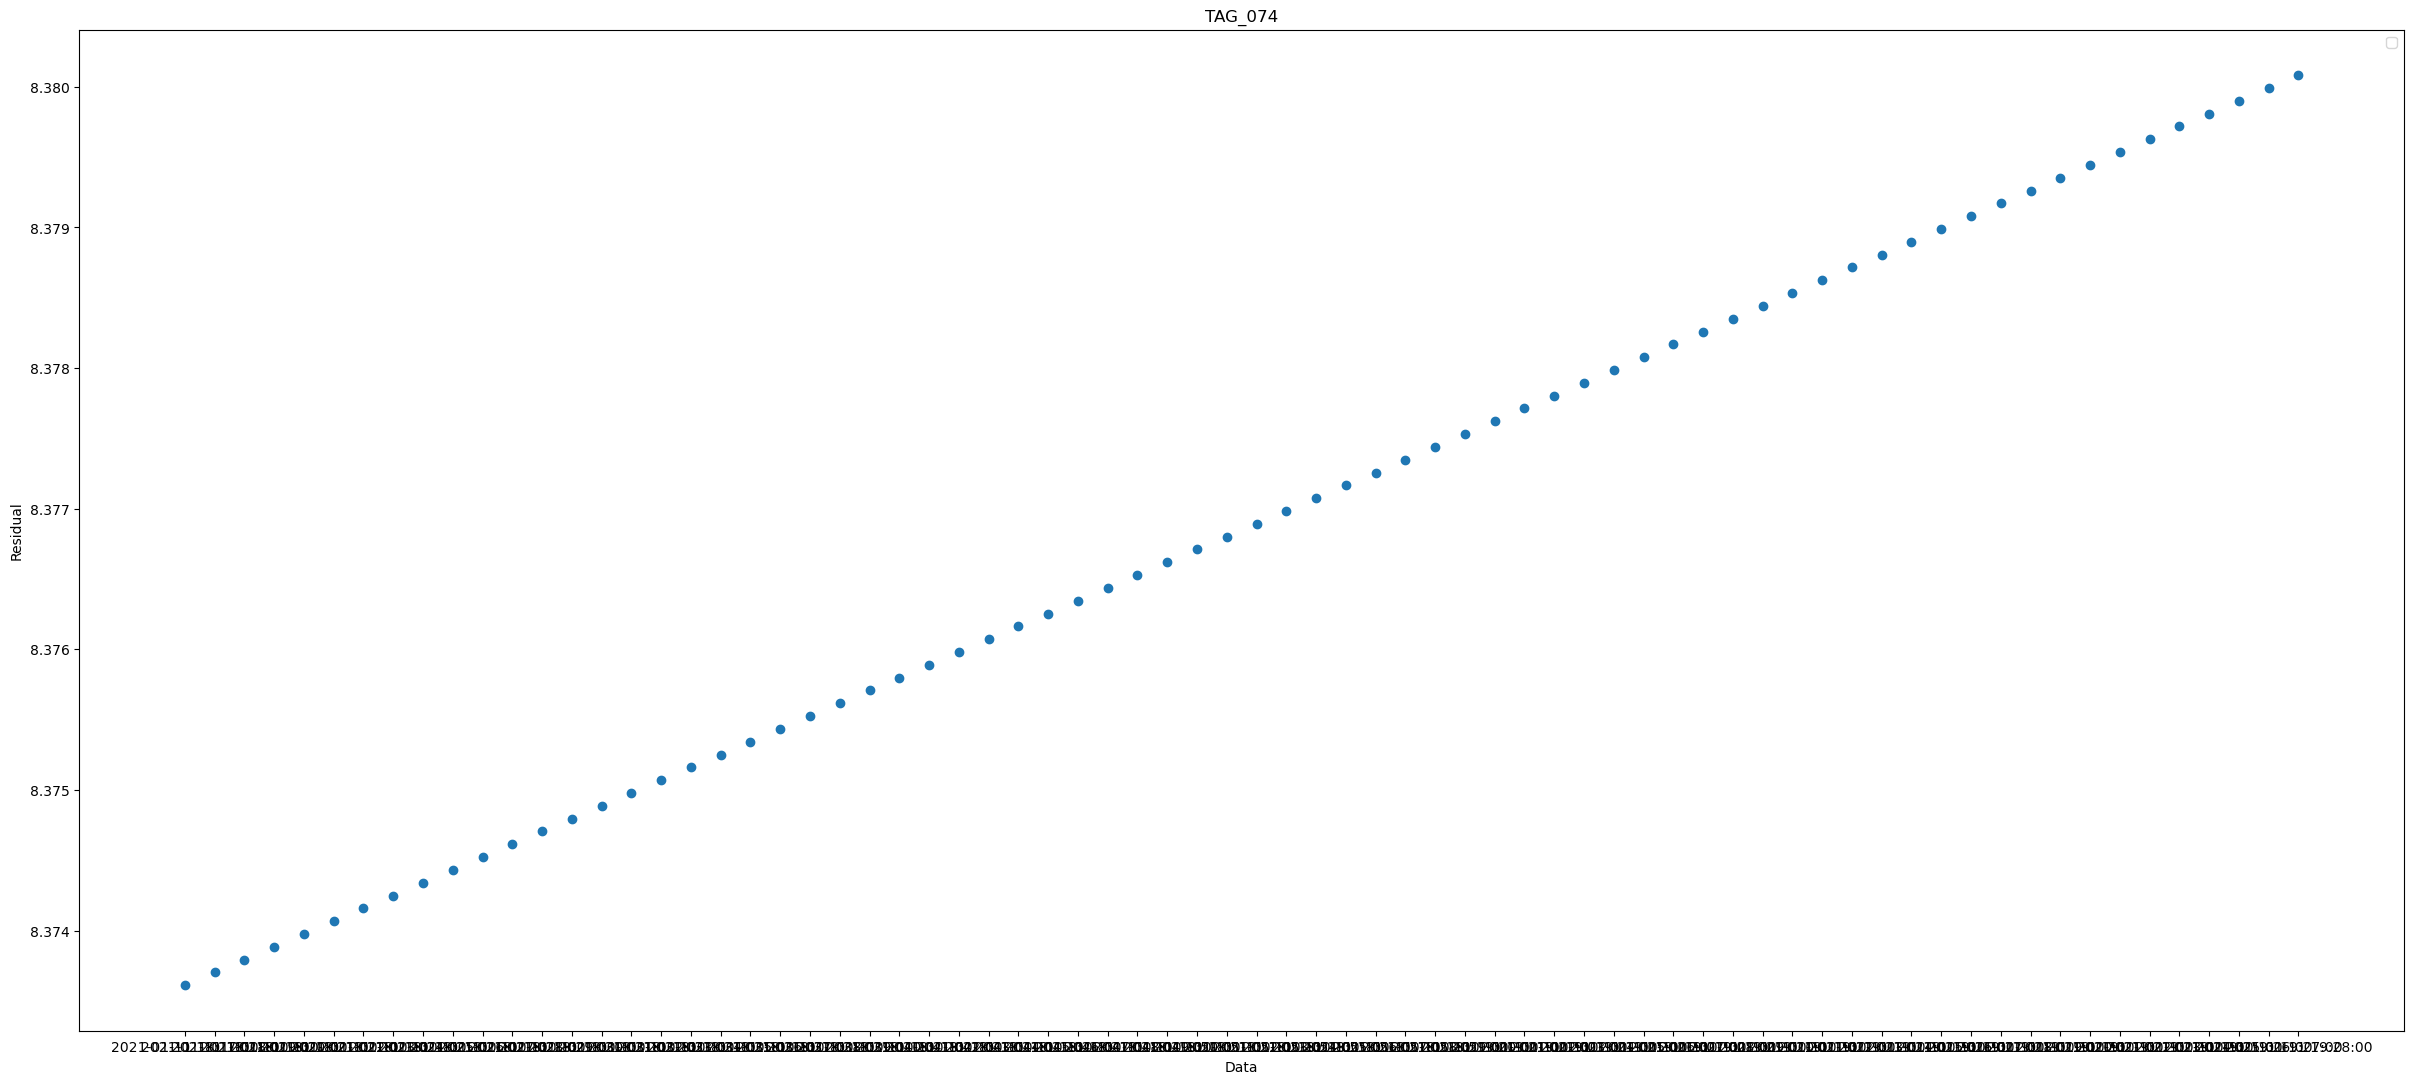

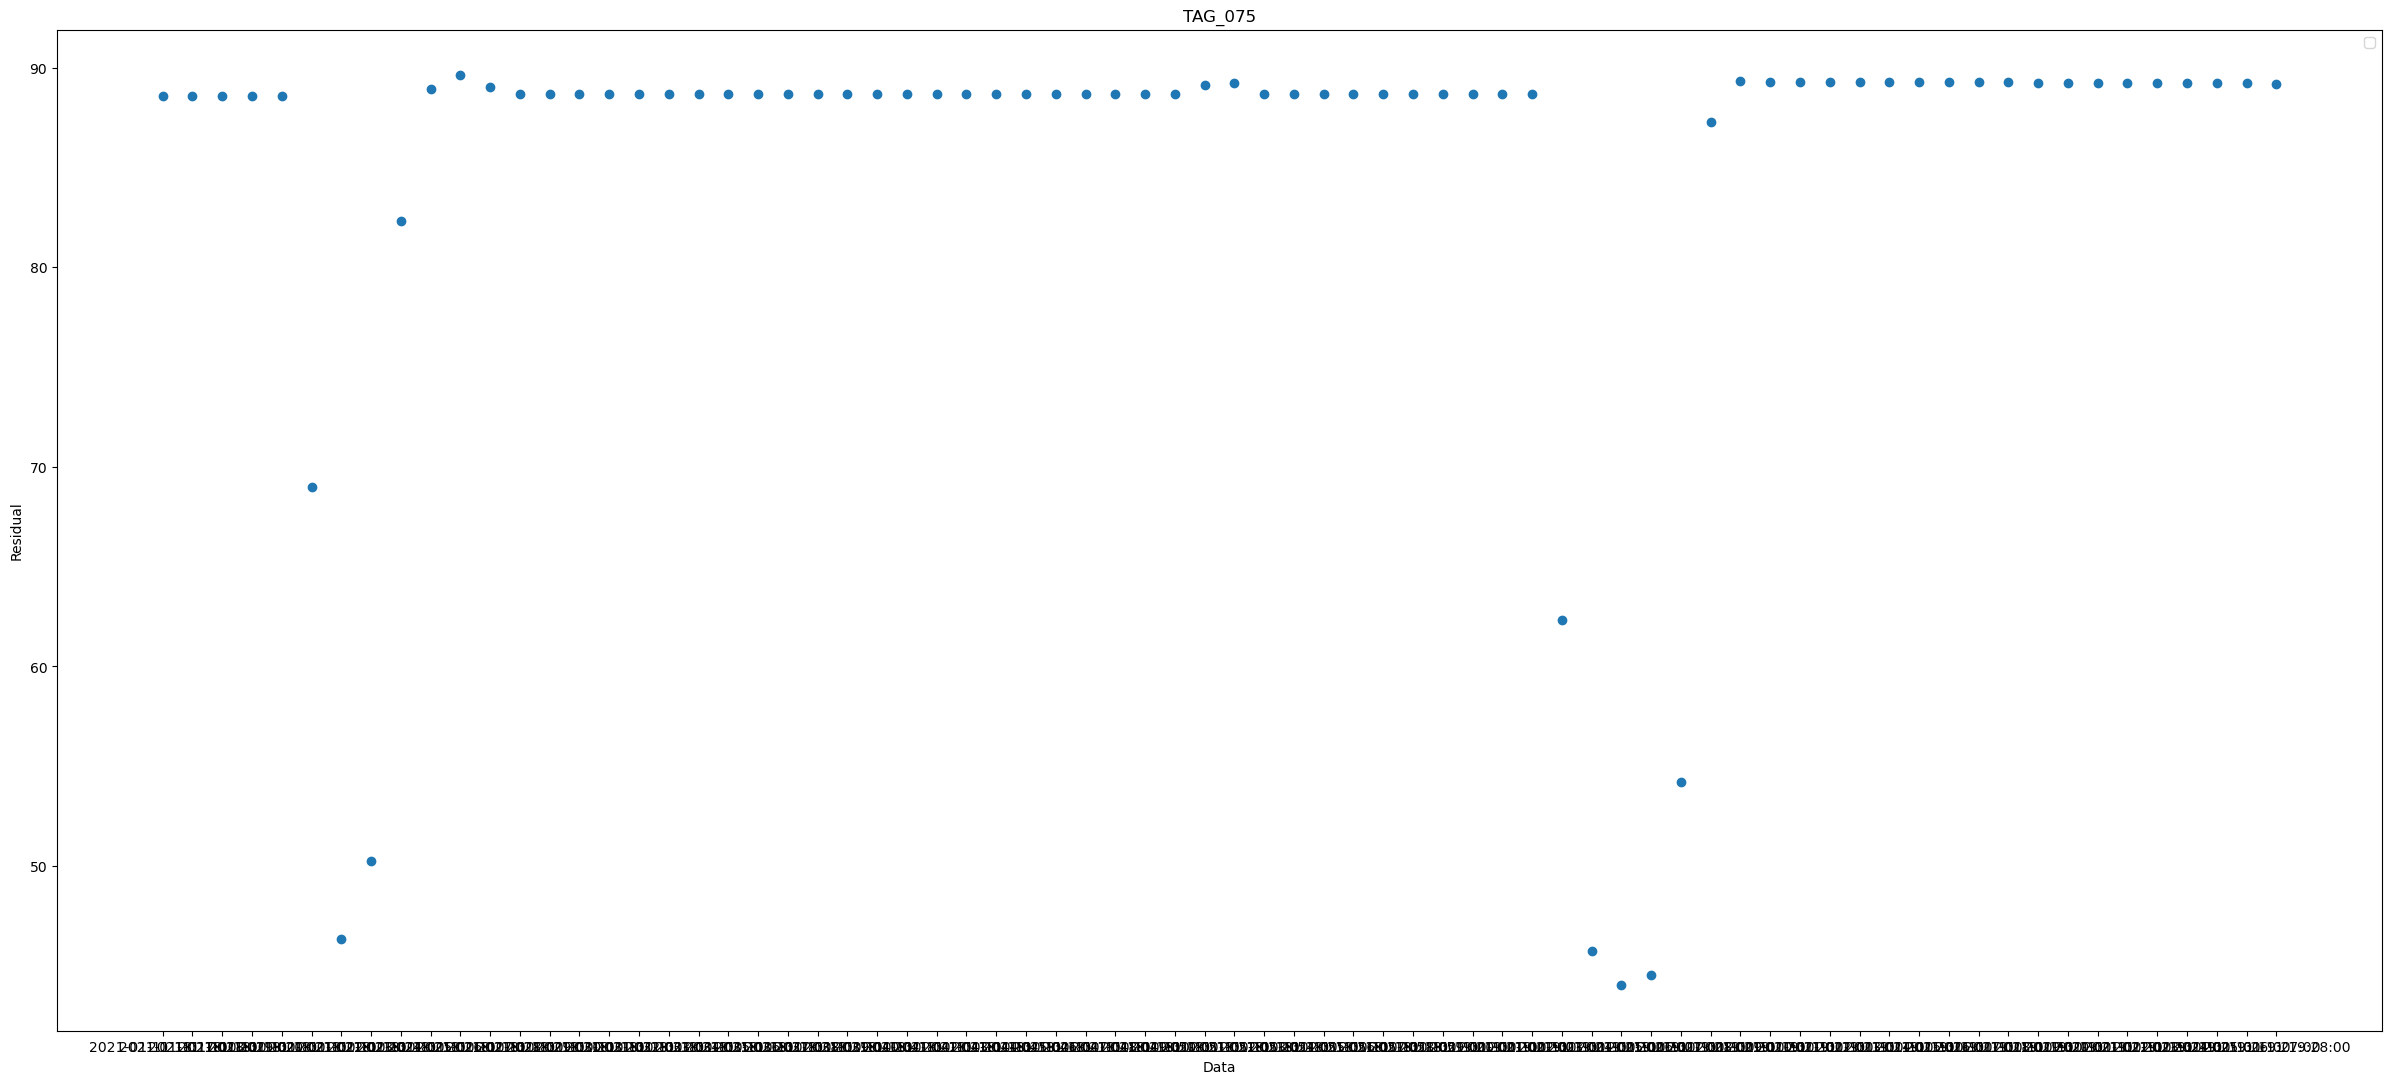

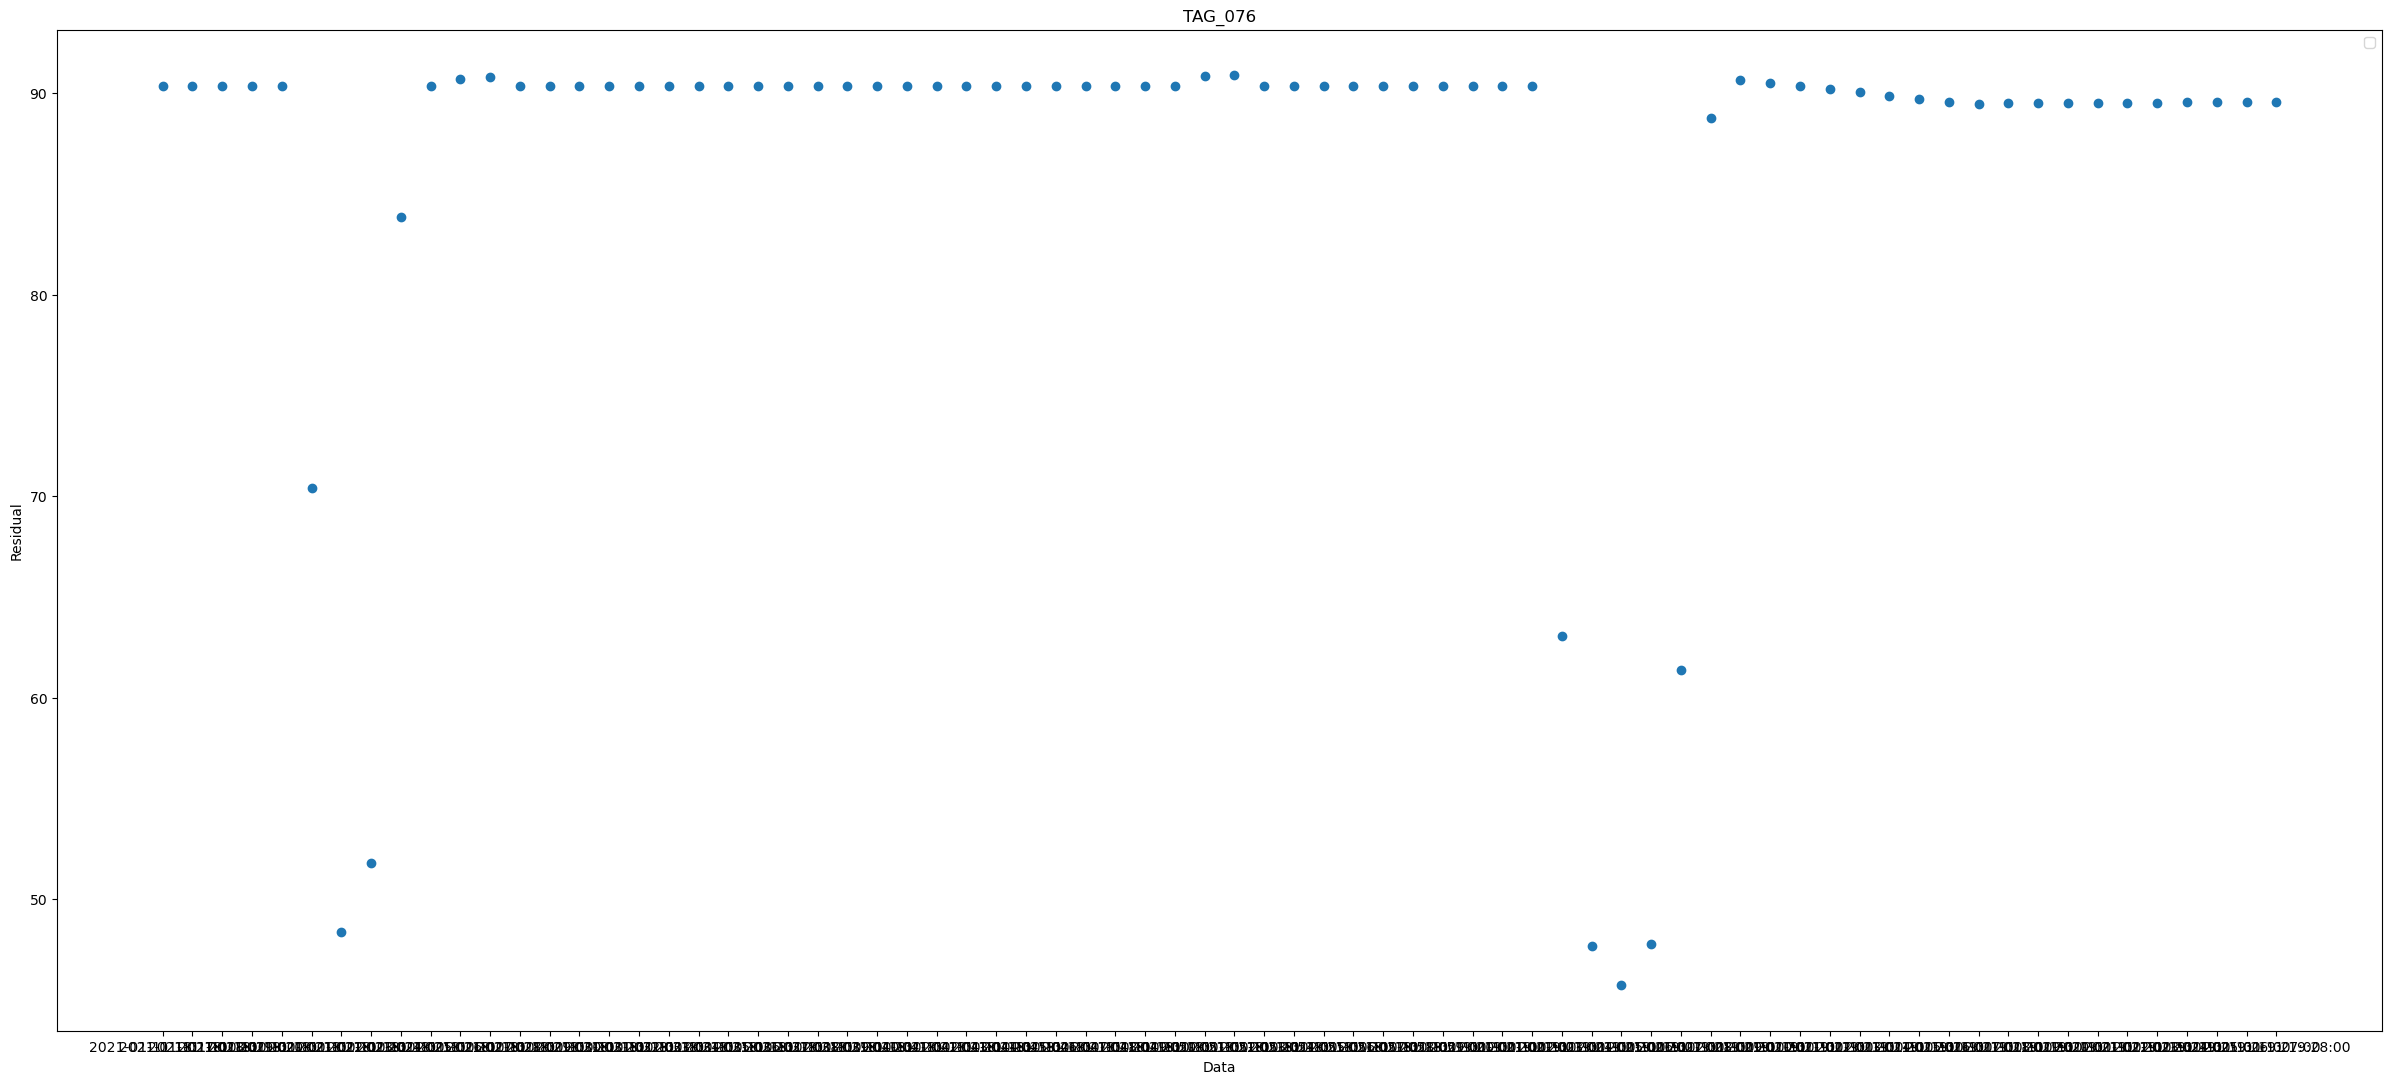

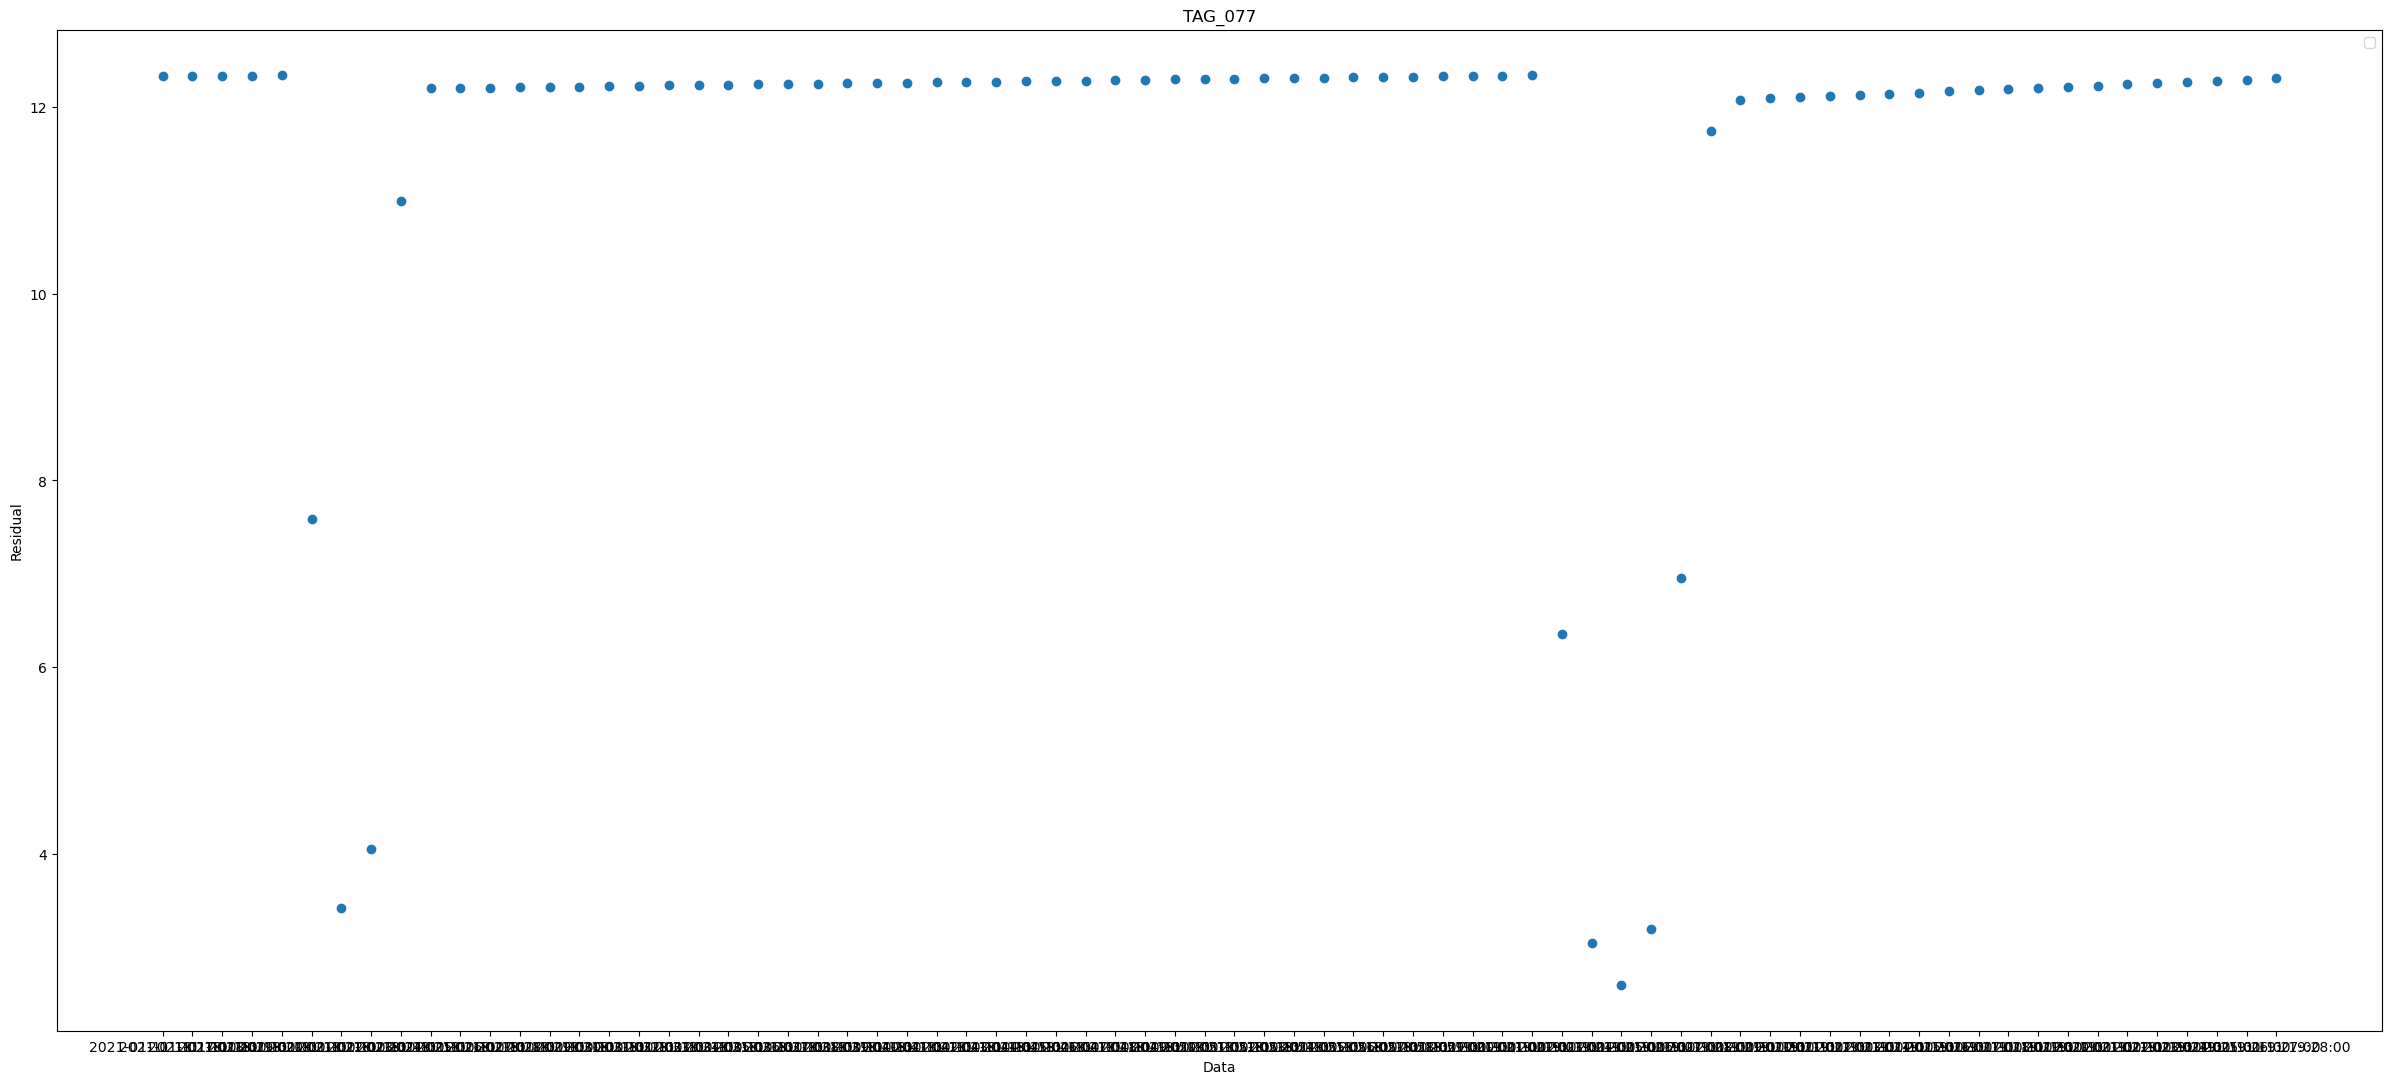

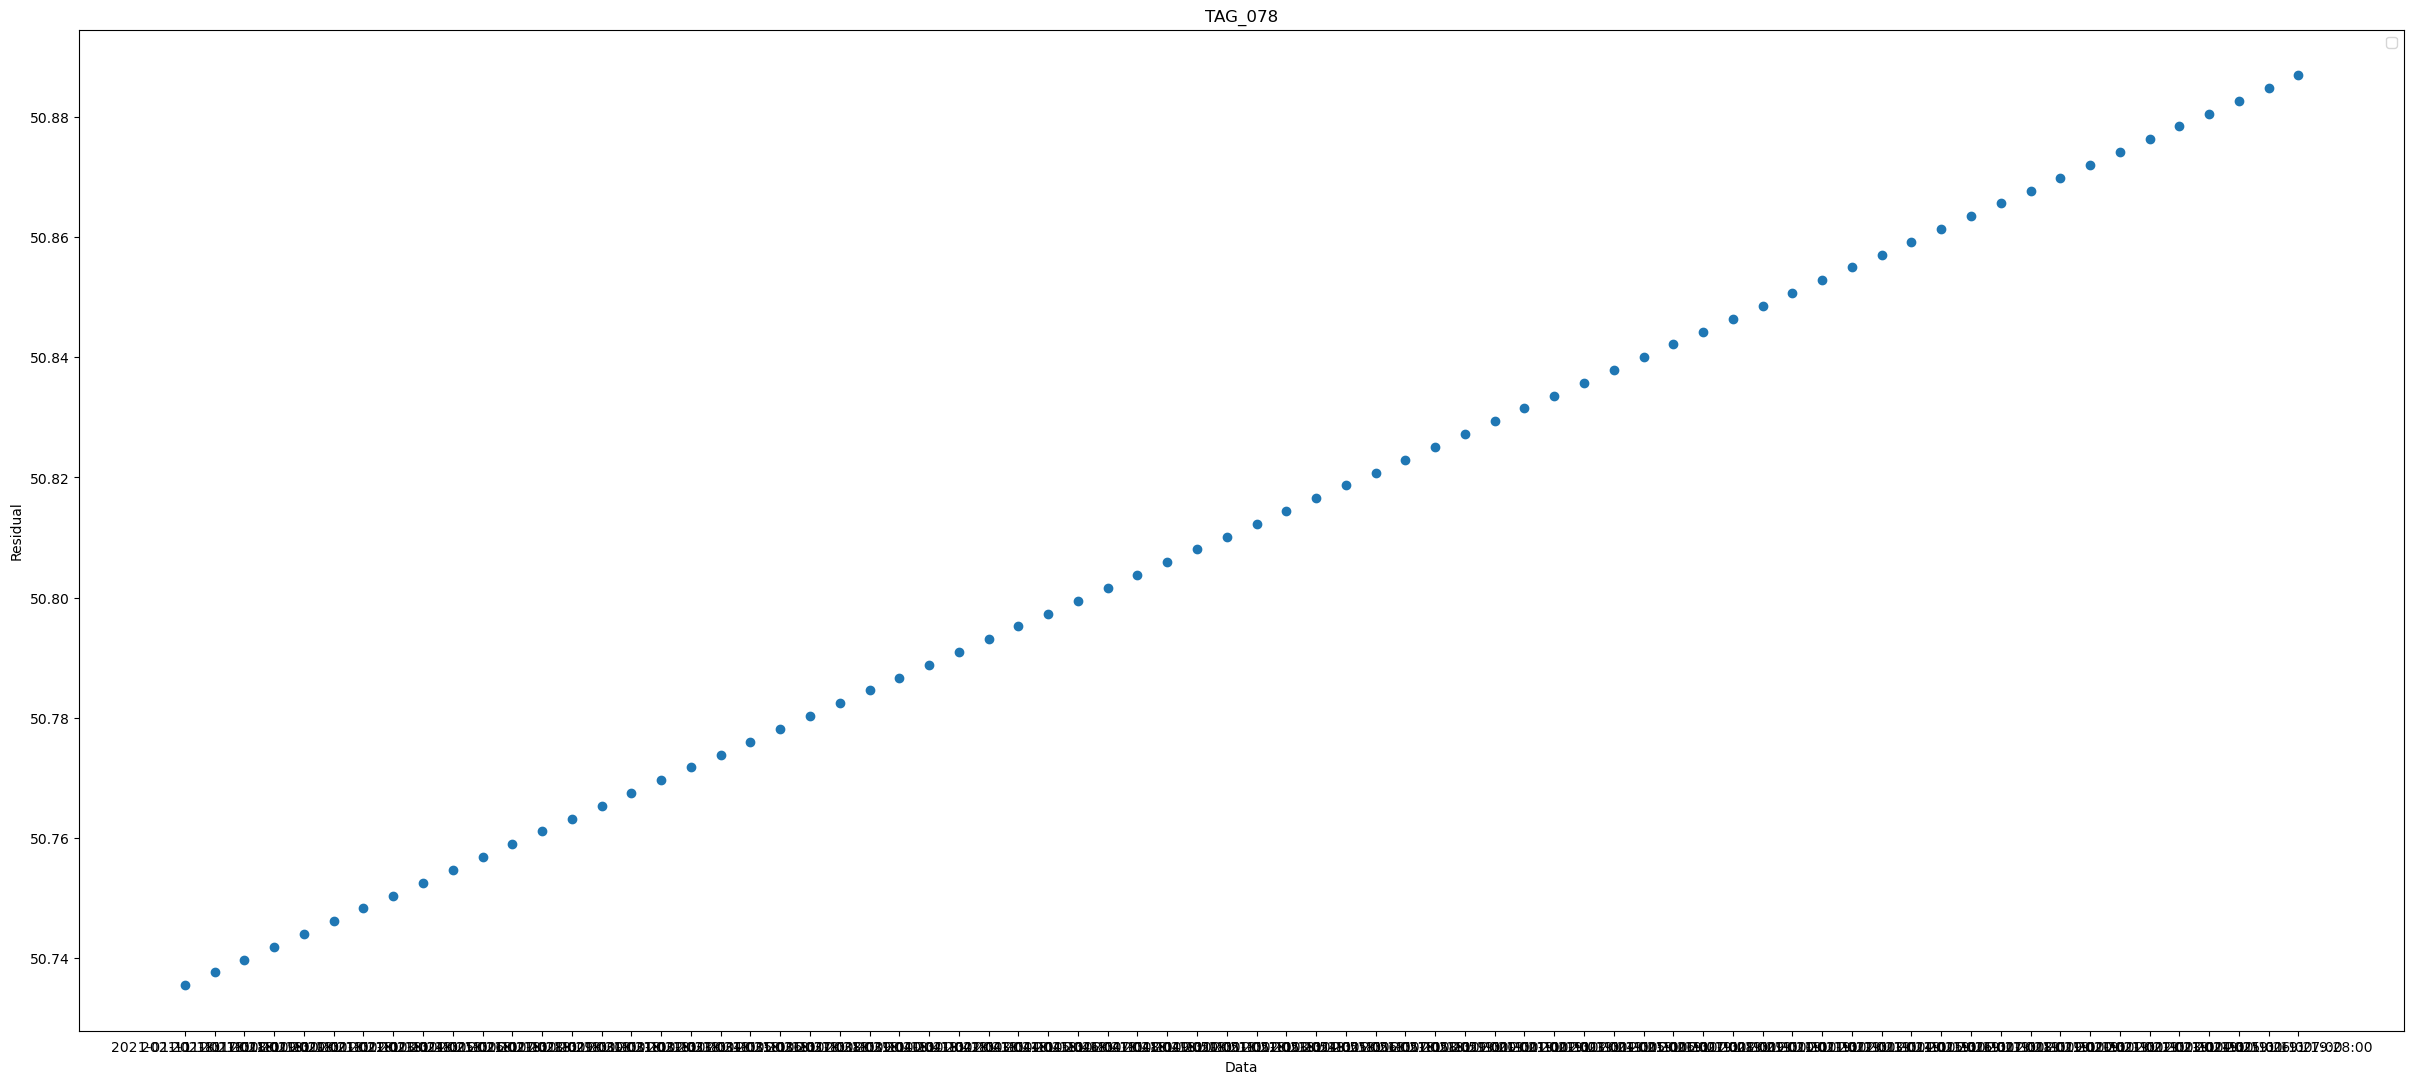

In [37]:
for i in press3_2.drop('datetime', axis=1):
    plt.subplots(figsize=(30,13))
    plt.scatter(press3_2['datetime'], press3_2[i])
    plt.title(i)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.legend()

In [41]:
all_tag

,datetime,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,...,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196,cause
0,2020-12-31 15:00:00,14.998843,3.627277,0.0,3.638380,150.183147,0.000000,0.0,0.0,NaN,...,40.442122,0.099745,0.505503,0.032899,0.000000,81.412858,NaN,51.836511,NaN,정상
1,2020-12-31 15:01:00,14.998953,3.629643,0.0,3.638348,150.200404,0.000000,0.0,0.0,NaN,...,40.621681,0.099763,0.505522,0.032911,0.000000,81.472849,NaN,51.838120,NaN,정상
2,2020-12-31 15:02:00,14.999063,3.632929,0.0,3.638315,150.217660,0.000000,0.0,0.0,NaN,...,40.774376,0.099781,0.505541,0.032922,0.000000,81.344790,NaN,51.839729,NaN,정상
3,2020-12-31 15:03:00,14.999173,3.607274,0.0,3.638283,150.234917,0.000000,0.0,0.0,NaN,...,40.744808,0.099799,0.505560,0.032934,0.000000,81.530460,NaN,51.841338,NaN,정상
4,2020-12-31 15:04:00,14.999284,3.651782,0.0,3.638250,150.252173,0.000000,0.0,0.0,NaN,...,40.681057,0.099817,0.505579,0.032946,0.000000,81.884934,NaN,51.842947,NaN,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208054,2021-05-25 05:26:00,13.880380,3.696824,0.0,3.738443,130.924301,32.015216,0.0,0.0,NaN,...,40.939249,0.120235,0.480703,0.011573,0.047129,35.261875,37.329421,48.148741,37.353651,정상
208055,2021-05-25 05:27:00,13.879545,3.695833,0.0,3.738461,130.934616,32.004384,0.0,0.0,NaN,...,43.186651,0.119821,0.480483,0.011335,0.047072,35.388196,37.323812,48.145355,37.348370,정상
208056,2021-05-25 05:28:00,13.878710,3.694774,0.0,3.738478,130.944931,31.993552,0.0,0.0,NaN,...,43.105887,0.119407,0.480263,0.011096,0.047015,34.546563,37.318202,48.141968,37.343088,정상
208057,2021-05-25 05:29:00,13.877875,3.693716,0.0,3.738495,130.955245,31.982720,0.0,0.0,NaN,...,39.983363,0.118992,0.480044,0.010858,0.046958,35.050686,37.312593,48.138582,37.337807,정상


In [43]:
all_tag[(all_tag['datetime']=='2021-11-26 18:52:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
471199,2021-11-26 18:52:00,14.664494,3.557164,3.545078,87.62868,0.0,0.0,0.0,100.0,91.559902,...,40.870084,40.627396,39.799559,41.234586,0.165241,0.296377,0.021802,0.092863,NaN,정상


In [44]:
all_tag[(all_tag['datetime']=='2021-11-26 19:54:00')==True]

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
471261,2021-11-26 19:54:00,14.678308,3.539555,3.52871,91.589227,0.0,0.0,0.0,100.0,91.591108,...,41.314907,39.363153,40.479267,19.203047,0.538717,0.265464,0.0434,0.102815,NaN,정상


In [45]:
press3_462 = all_tag.loc[471199:471261, ['datetime','TAG_072','TAG_073','TAG_074','TAG_075','TAG_076','TAG_077','TAG_078']]
press3_462

,datetime,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078
471199,2021-11-26 18:52:00,89.006486,86.926701,9.047233,97.625389,101.288211,14.020094,49.488057
471200,2021-11-26 18:53:00,89.006548,86.926730,9.047232,97.625389,101.288137,14.020090,49.483398
471201,2021-11-26 18:54:00,89.006611,86.926759,9.047231,97.625389,101.288062,14.020087,49.478740
471202,2021-11-26 18:55:00,89.006674,86.926787,9.047230,97.625389,101.287988,14.020083,49.474082
471203,2021-11-26 18:56:00,89.006736,86.926815,9.047229,97.625389,101.287914,14.020079,49.469423
...,...,...,...,...,...,...,...,...
471257,2021-11-26 19:50:00,89.010120,86.928354,9.047174,97.577393,101.216310,13.967724,49.217875
471258,2021-11-26 19:51:00,89.010183,86.928382,9.047173,97.577521,101.216421,13.967849,49.213216
471259,2021-11-26 19:52:00,89.010245,86.928410,9.047172,97.577649,101.216531,13.967973,49.208558
471260,2021-11-26 19:53:00,89.010308,86.928439,9.047171,97.577776,101.216642,13.968098,49.203900


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

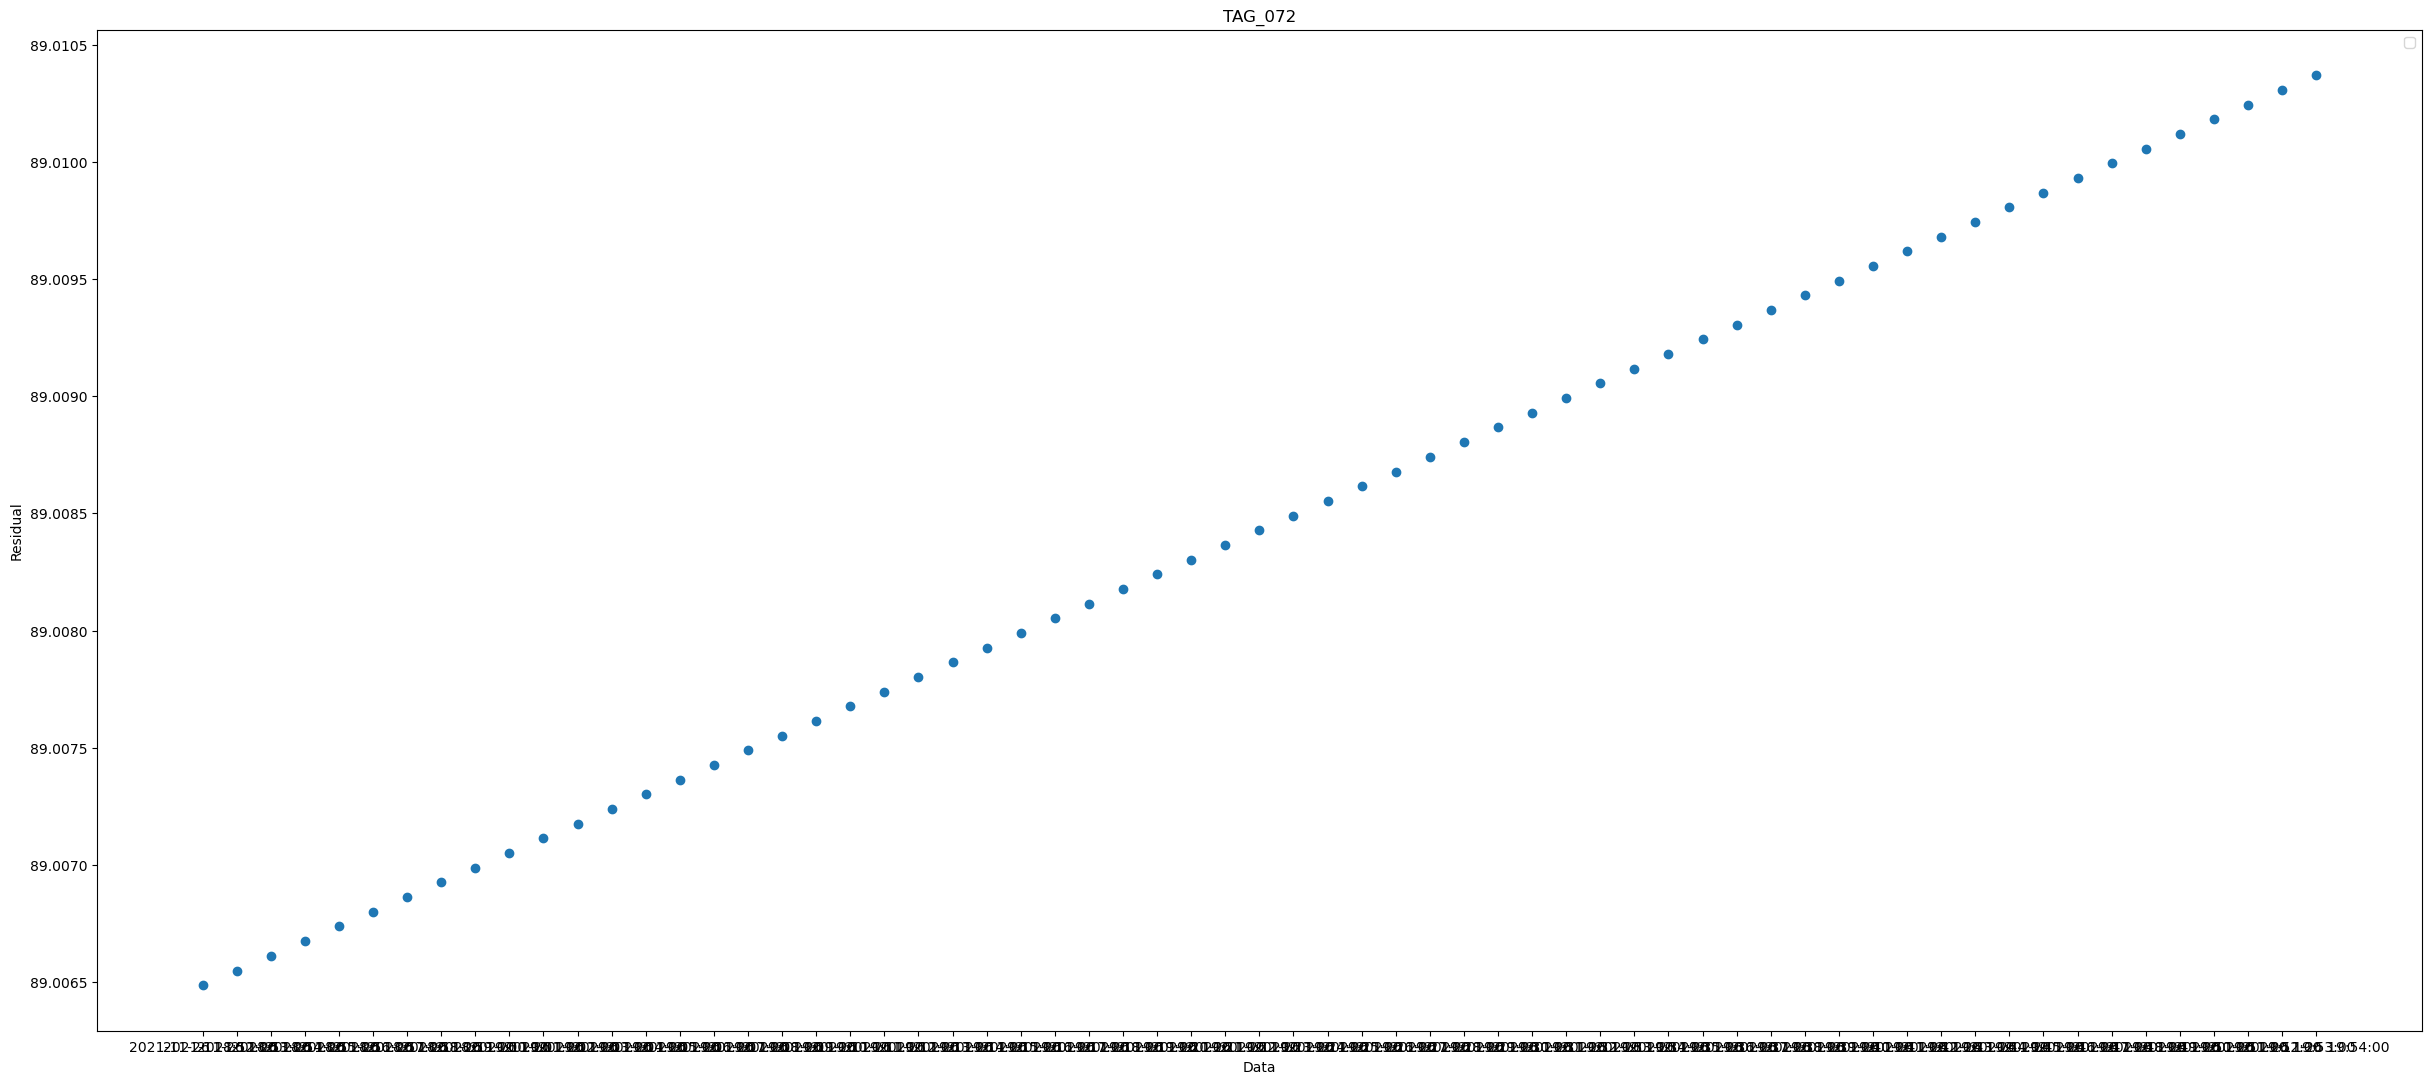

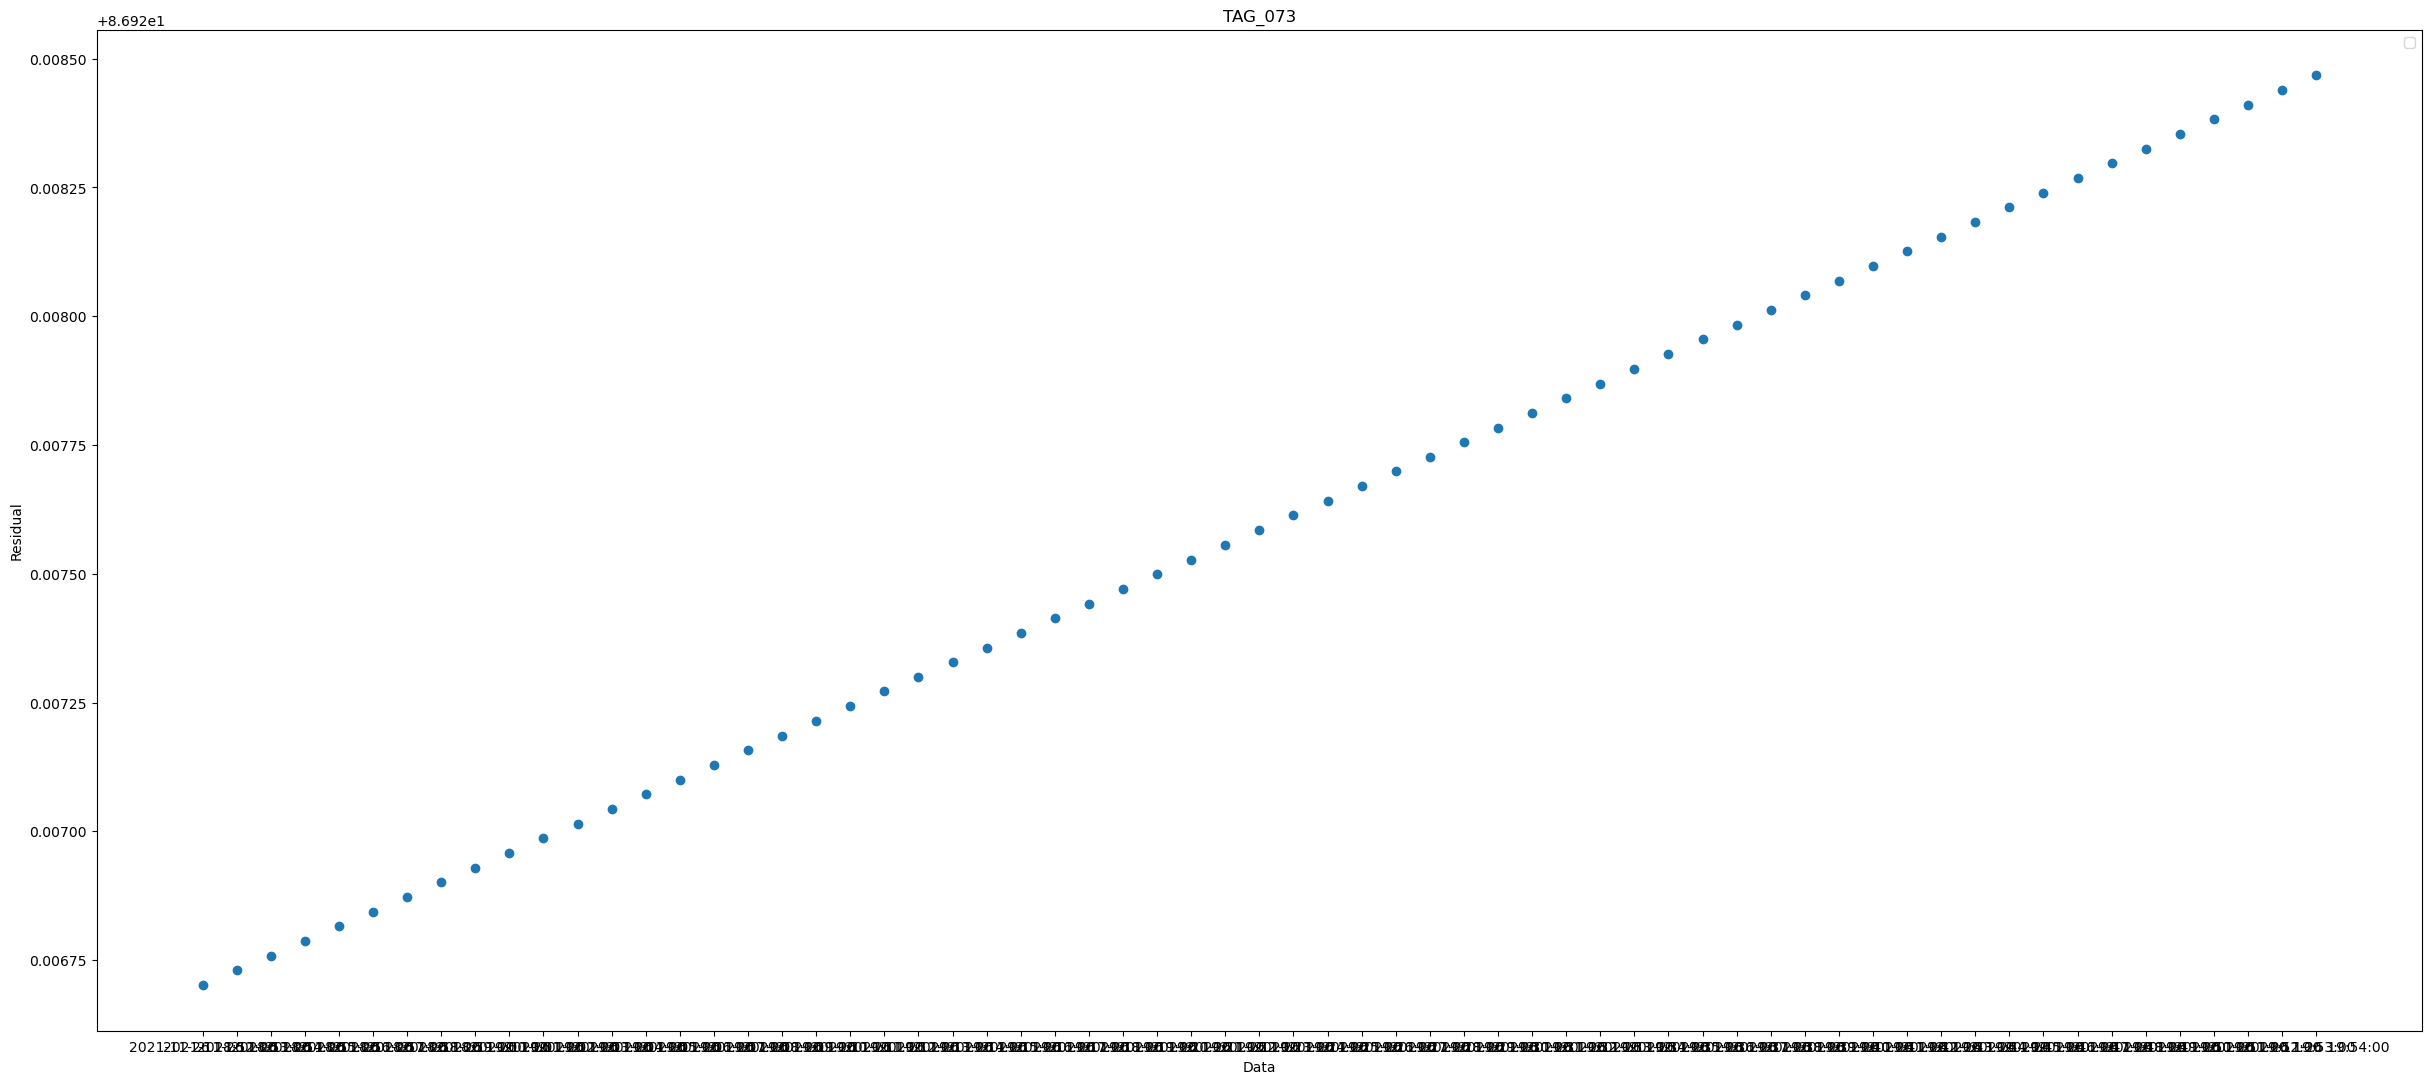

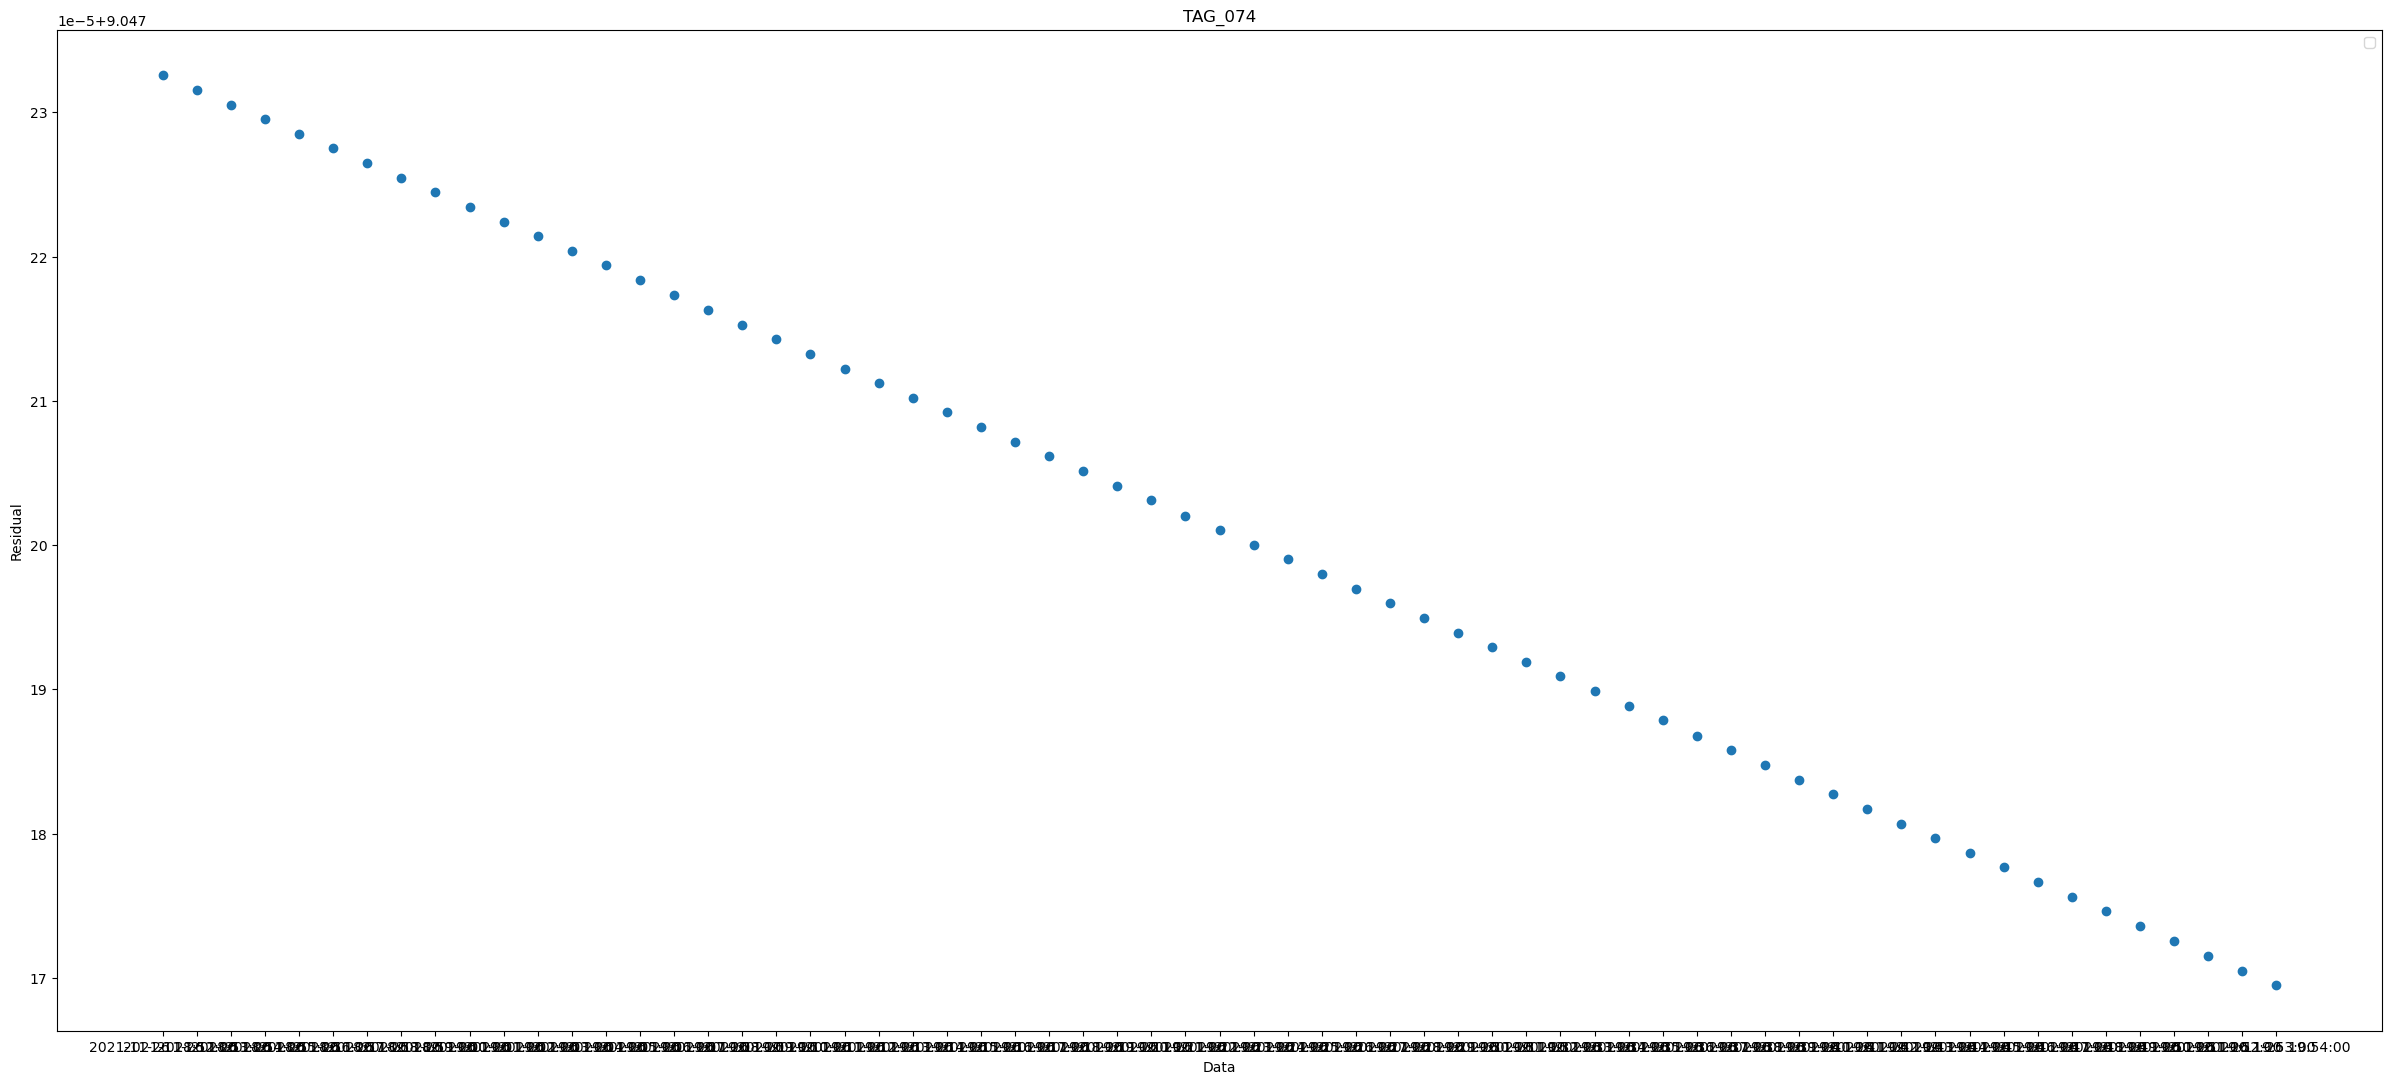

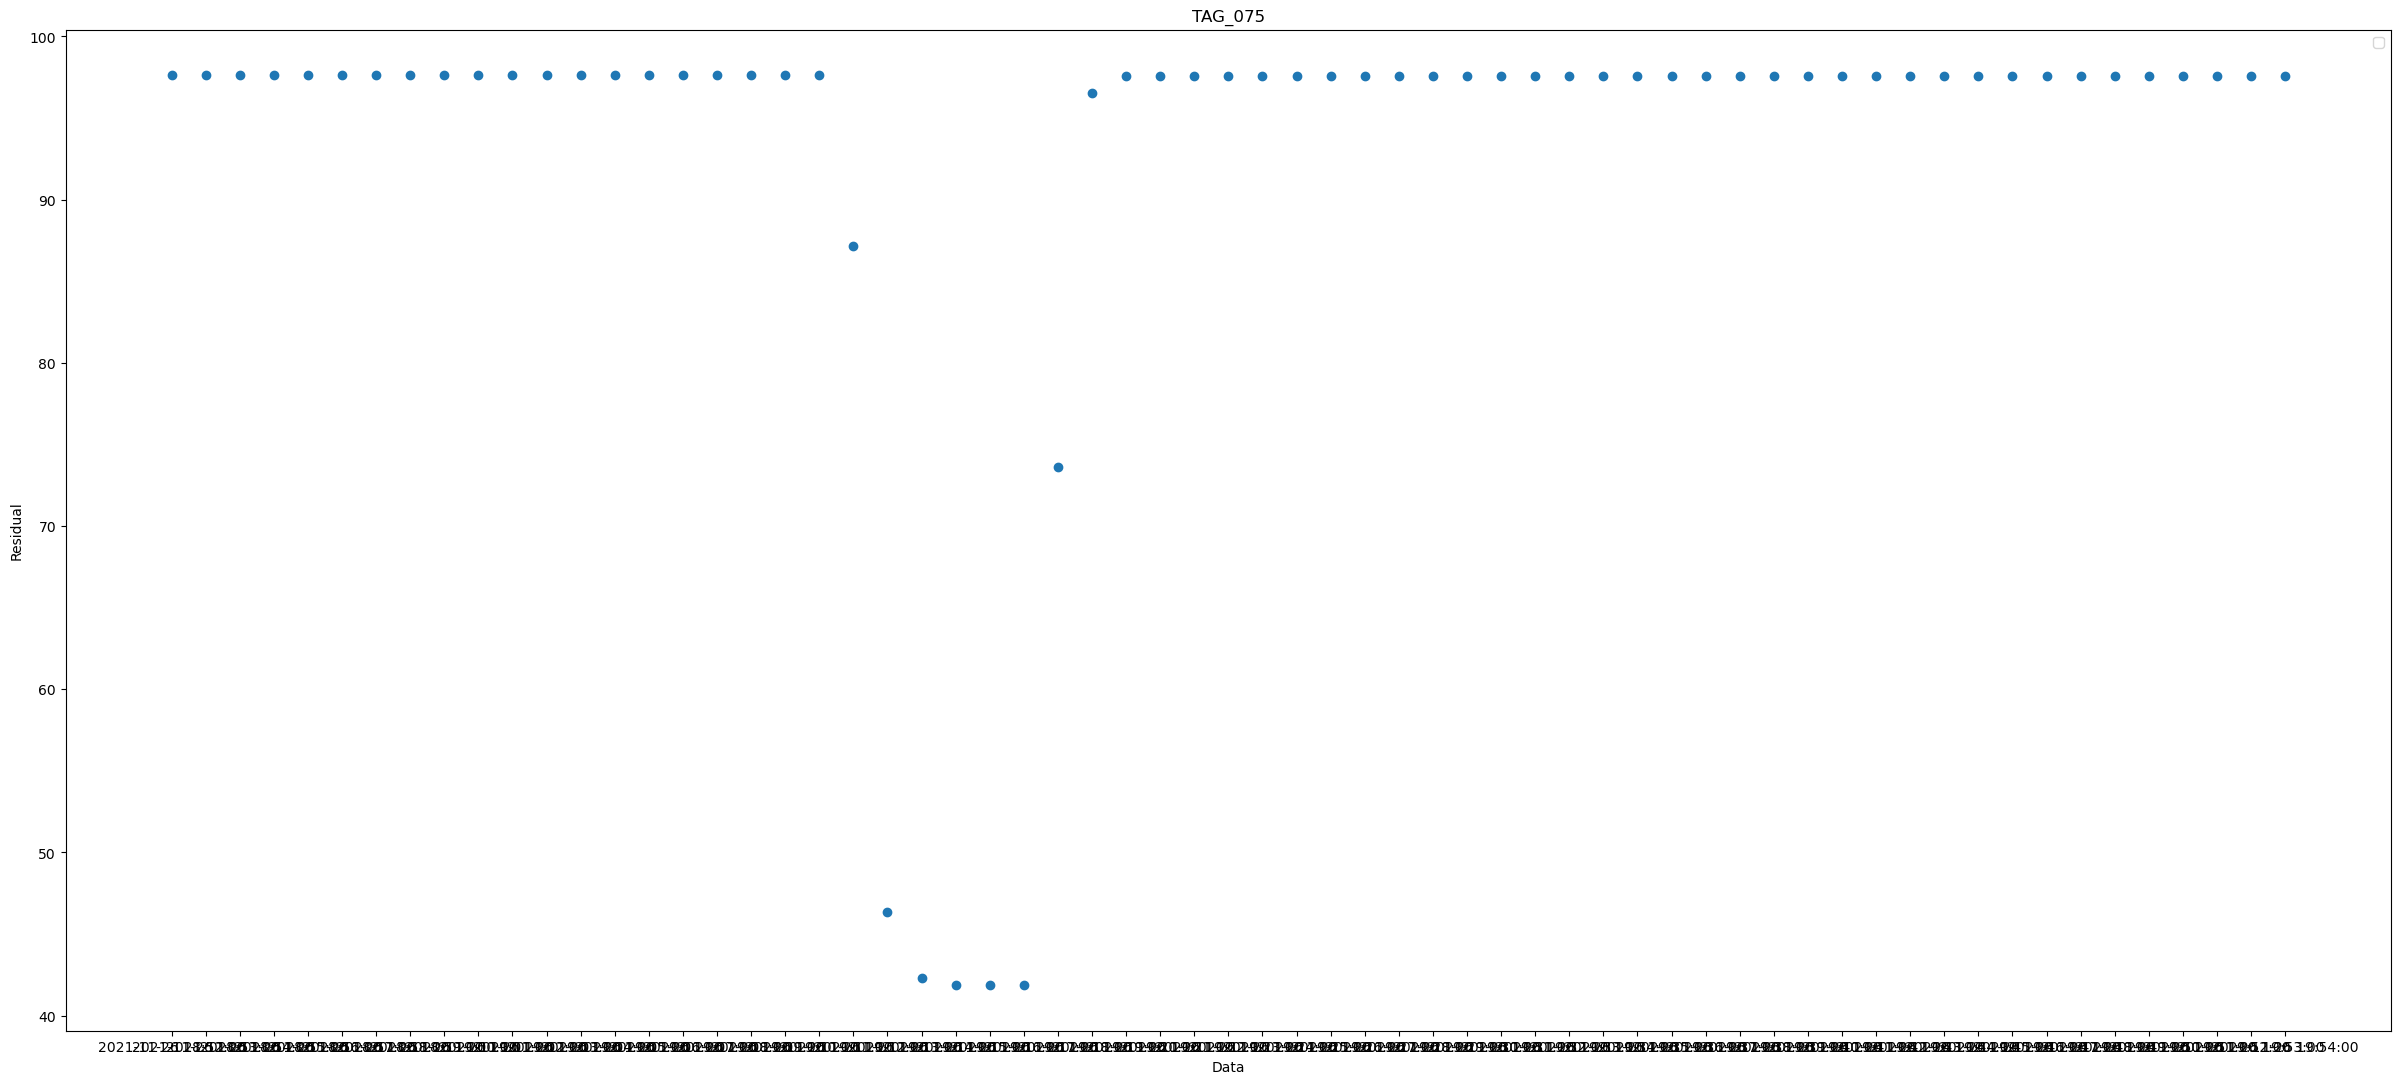

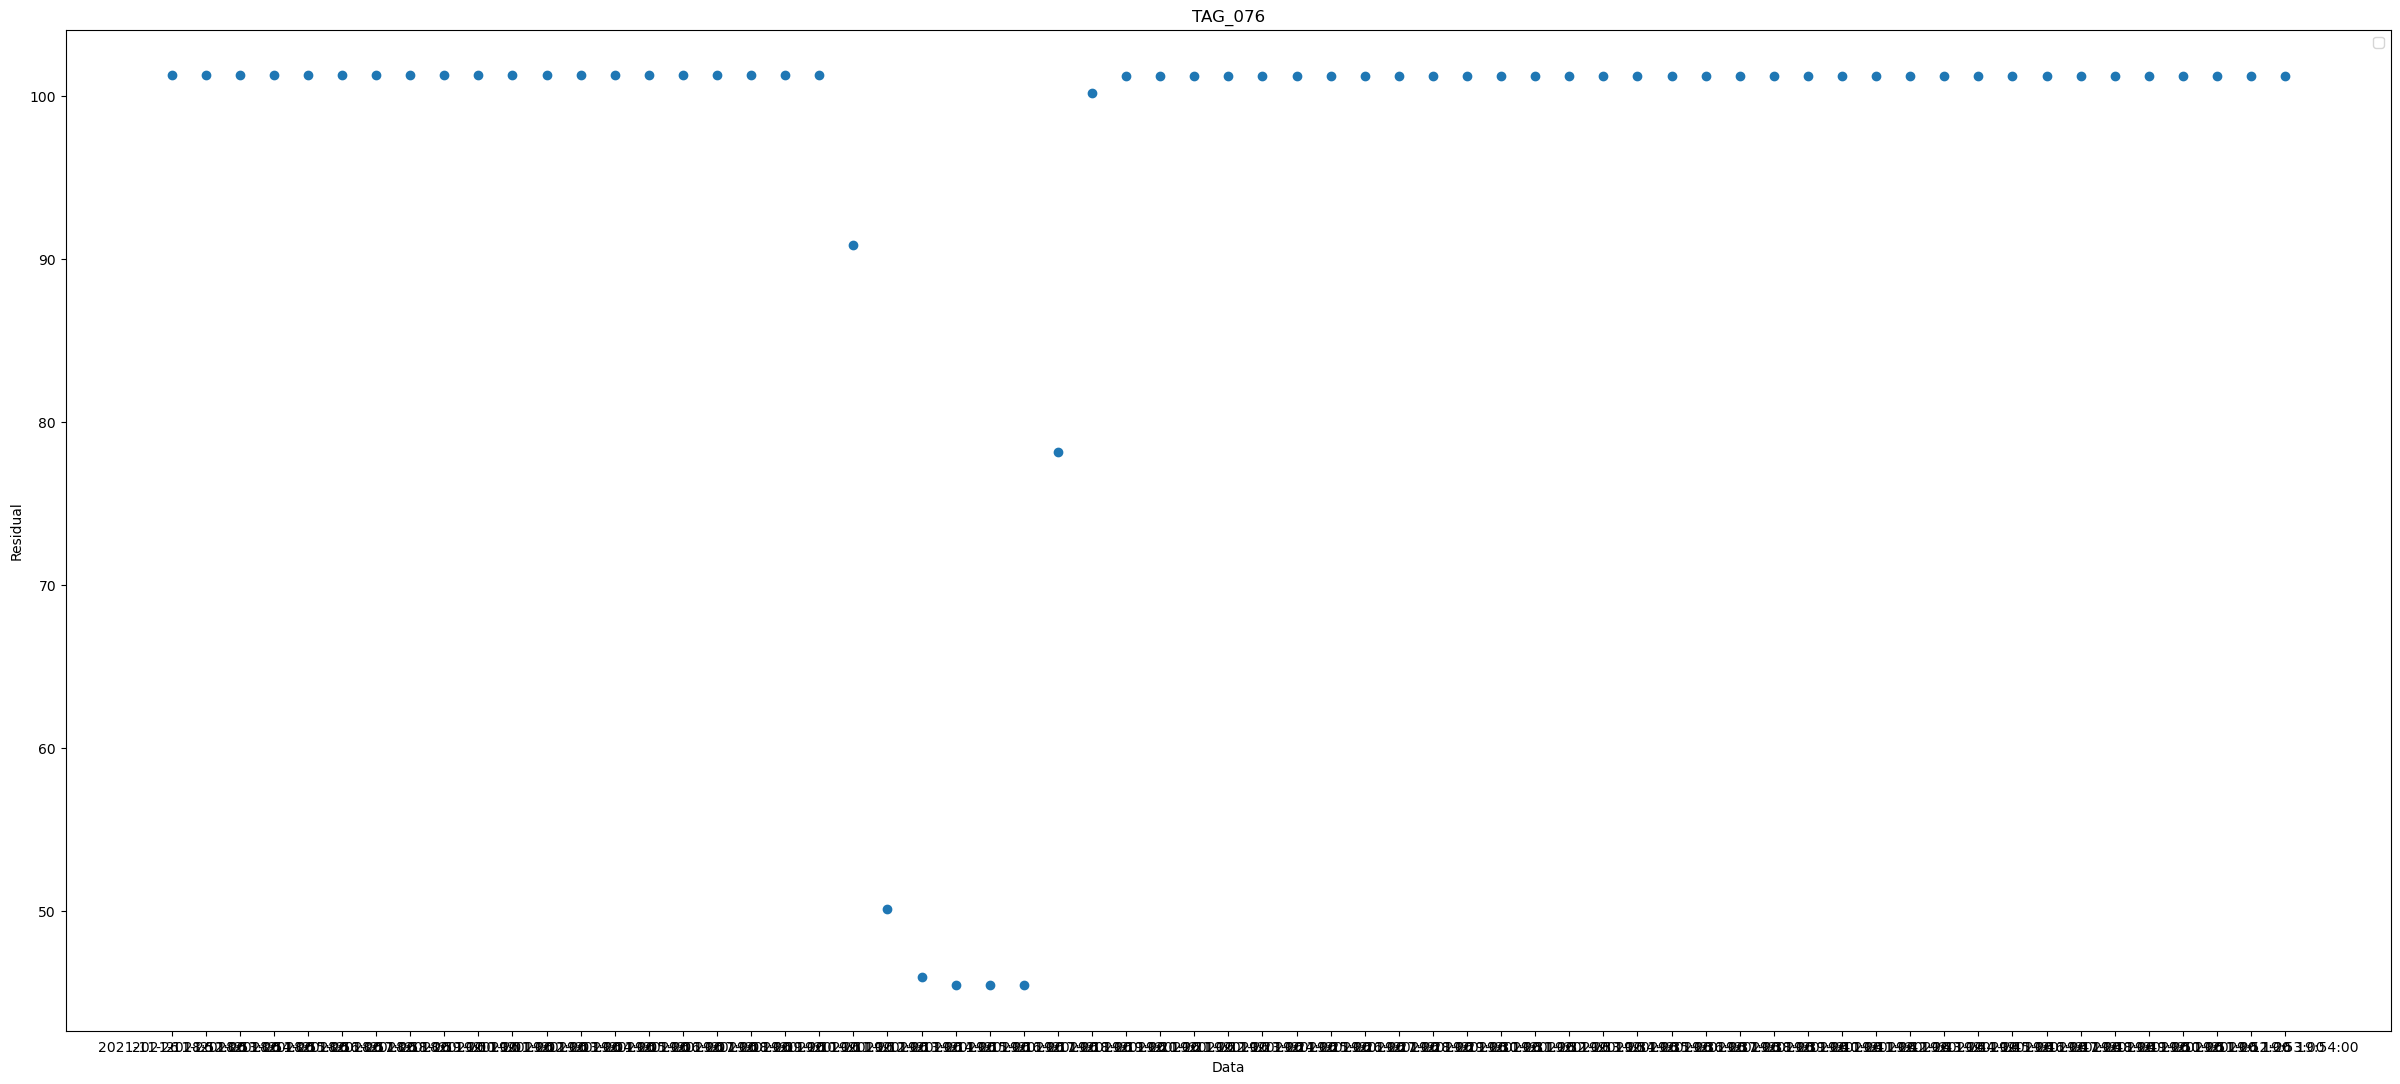

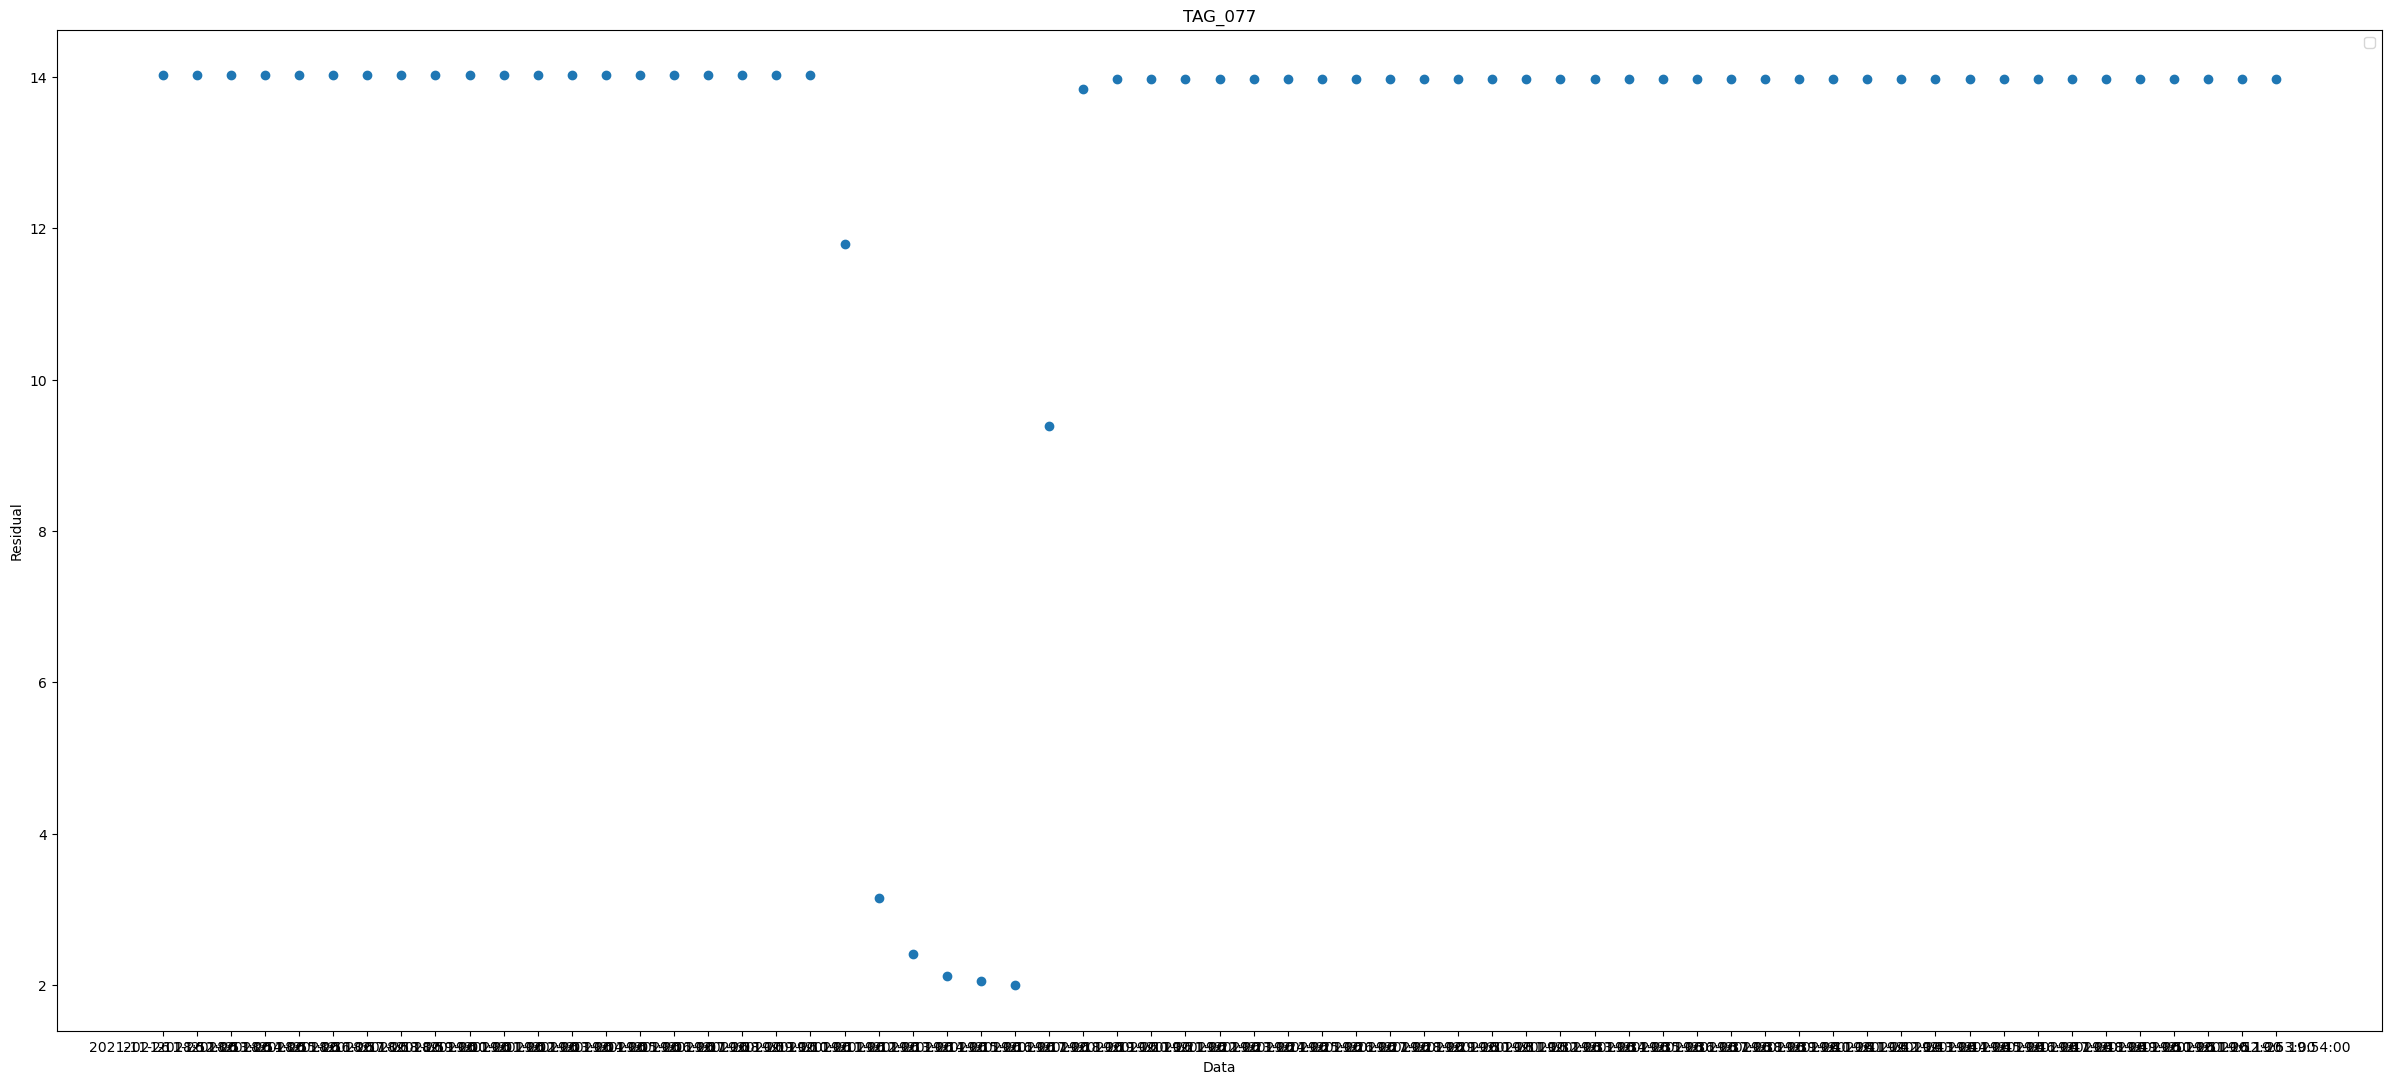

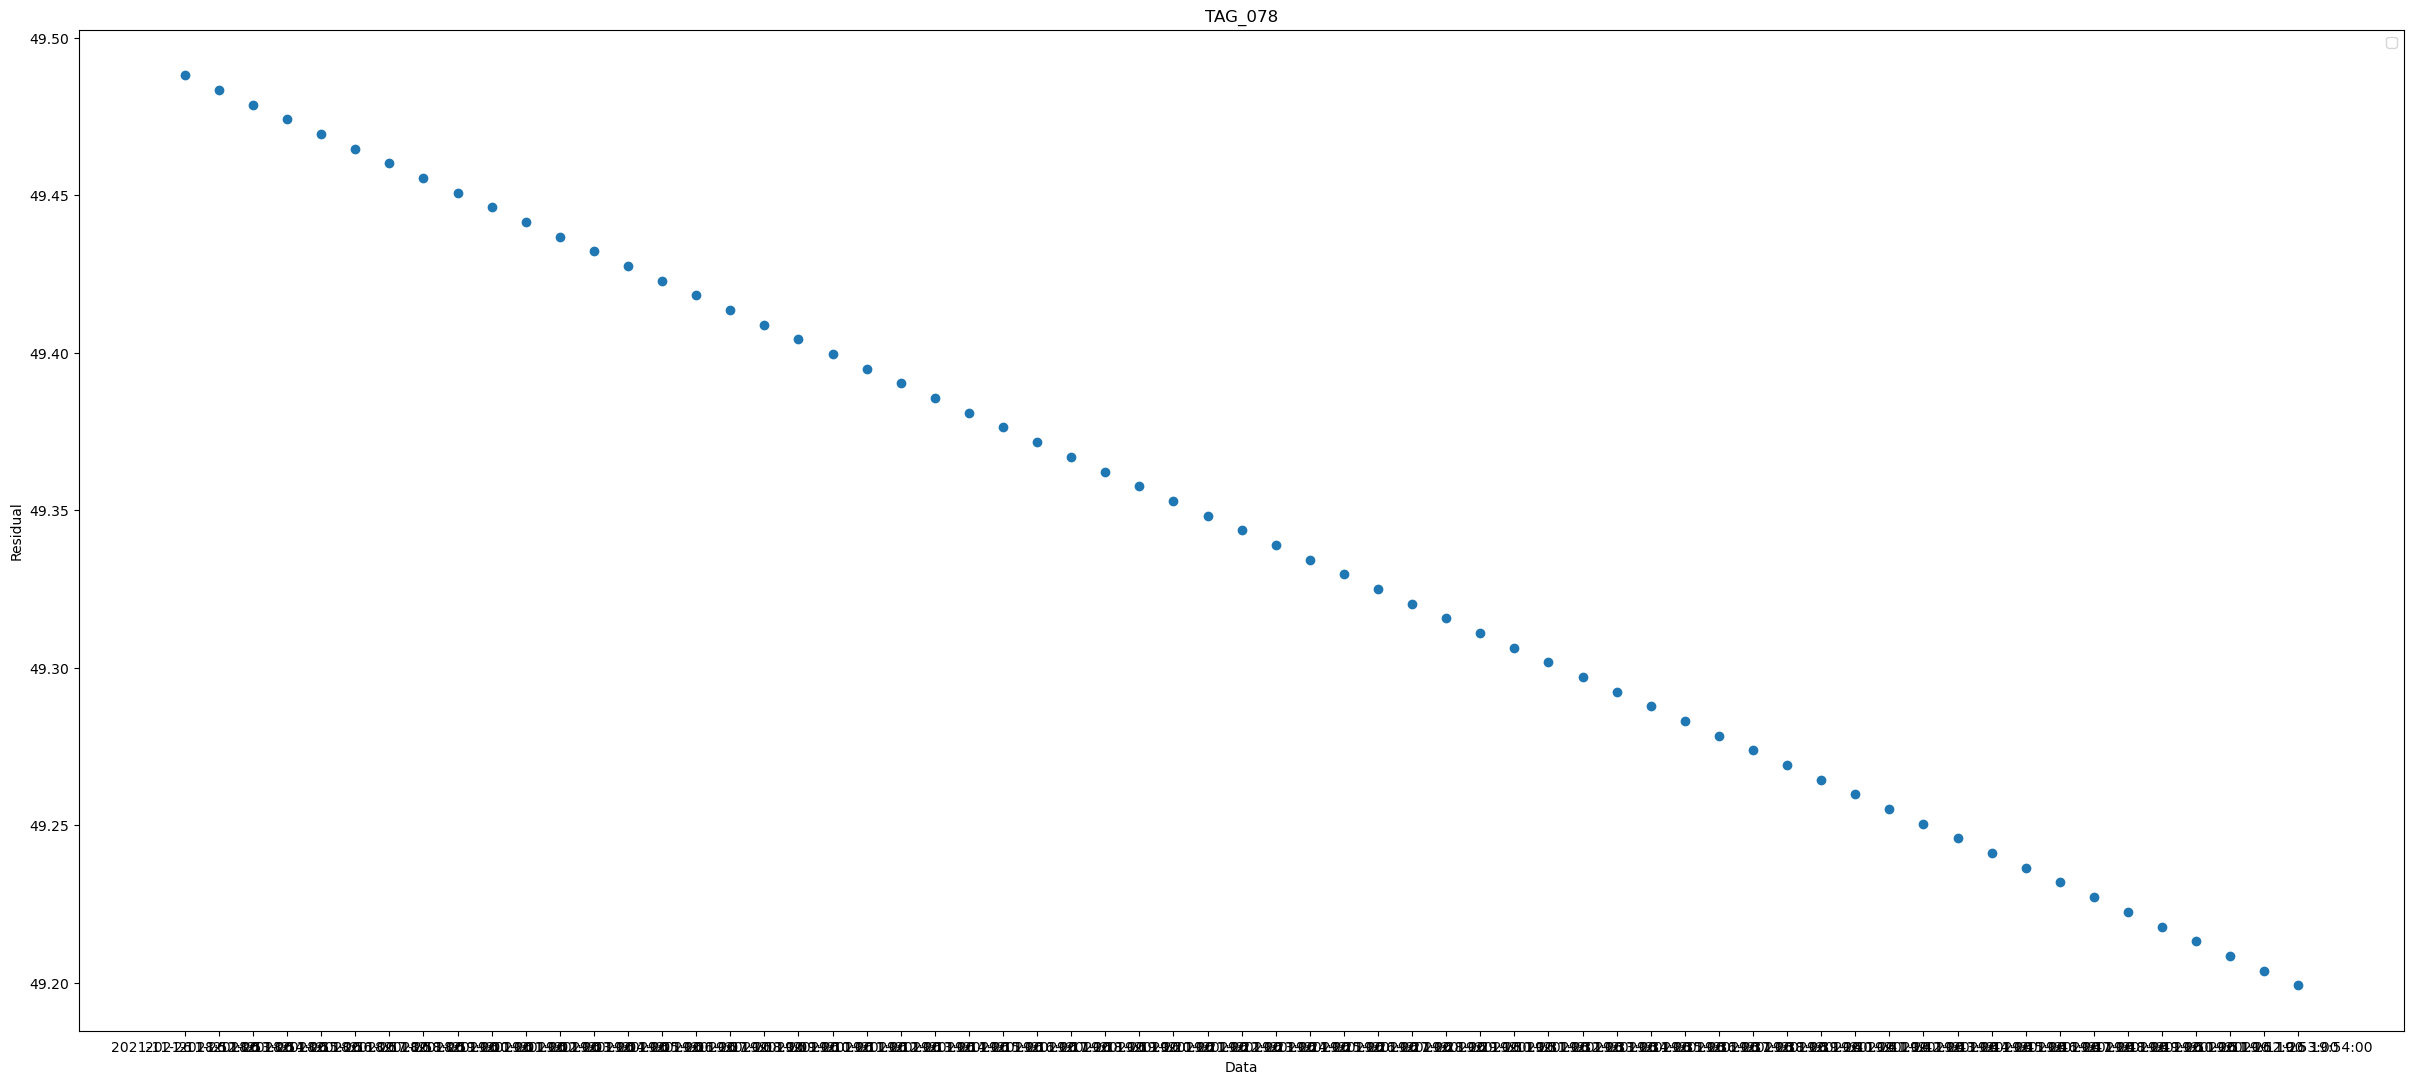

In [46]:
for i in press3_462.drop('datetime', axis=1):
    plt.subplots(figsize=(30,13))
    plt.scatter(press3_462['datetime'], press3_462[i])
    plt.title(i)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.legend()